# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
    - [1 Анализ сотрудников компании](#1-Анализ-сотрудников-компании)
    - [2 Оценка результатов работы сотрудников](#2-Оценка-результатов-работы-сотрудников)
    - [3 Мотивация сотрудников](#3-Мотивация-сотрудников)
    - [4 Частота причин увольнения](#4-Частота-причин-увольнения)
    - [5 Анализ трат на рекрутинг](#5-Анализ-трат-на-рекрутинг)
    
    
- [Часть вторая](#Часть-вторая)
    - [1 Описание и начальная работа с данными](#1-Описание-и-начальная-работа-с-данными)
    - [2 Анализ интереса аудитории к постам](#2-Анализ-интереса-аудитории-к-постам)
    - [Выводы](#Выводы)
    - [Рекомендации для SMM-отдела](#Рекомендации-для-SMM-отдела)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [1]:
# импортируем библиотеки

import sqlalchemy
import psycopg2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = plt.get_cmap('Set1')
plt.style.use('fivethirtyeight')

In [2]:
# выполняем подключение к БД

conn = 'some parametrs'
engine = sqlalchemy.create_engine(conn)
connect = engine.connect()

In [3]:
# проверяем какие таблицы есть в БД
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['hr_dataset', 'production_staff', 'recruiting_costs', 'salary_grid']

## Опишем все параметры в таблицах БД human_resources

Так как у нас нет данных о таблицах БД, сначала изучим и опишем, какие данные они содержат. 

### Таблица hr_dataset
Содержит информацию о сотрудниках

параметры:
- id - индификатор записи в таблице
- Employee Name - имя сотрудника
- Employee Number - идентификаор сотрудника
- marriedid - статус семейного положения
- maritalstatusid - id статуса семейного положения
- genderid - id гендера 
- empstatus_id - статус работника 
- deptid - id отдела
- perf_scoreid - оценка качества работы
- age - возраст
- Pay Rate - ставка оплаты
- state - штат 
- zip - почтовый код 
- dob - дата рождения
- sex - пол
- maritaldesc - семейное положение
- citizendesc - гражданство
- Hispanic/Latino - признак латиноамериканца
- racedesc - раса
- Date of Hire - дата приема на работу
- Days Employed - рабочий стаж в днях
- Date of Termination - дата уволнения
- Reason For Term - причина уволнения
- Employment Status - статус занятости
- department - отдел
- position - должность
- Manager Name - имя руководителя
- Employee Source - где нашел вакансию
- Performance Score - оценка производительности



In [330]:
# запрос к таблице hr_dataset для получения инф. о названиях колонок и типах данных
df = pd.read_sql('SELECT TABLE_NAME, COLUMN_NAME, DATA_TYPE, IS_NULLABLE\
           FROM INFORMATION_SCHEMA.COLUMNS\
           WHERE table_name = %s', connect, params=('hr_dataset',))
df

,table_name,column_name,data_type,is_nullable
0,hr_dataset,id,integer,NO
1,hr_dataset,Employee Name,character varying,YES
2,hr_dataset,Employee Number,integer,YES
3,hr_dataset,marriedid,integer,YES
4,hr_dataset,maritalstatusid,integer,YES
5,hr_dataset,genderid,integer,YES
6,hr_dataset,empstatus_id,integer,YES
7,hr_dataset,deptid,integer,YES
8,hr_dataset,perf_scoreid,integer,YES
9,hr_dataset,age,integer,YES


### Таблица production_staff
Содержит информацию о производственном персонале

параметры:
- id - индивидуальный идентификатор записи в таблице
- Employee Name - имя сотрудника
- Race Desc - раса
- Date of Hire - дата найма
- TermDate - дата увольнения
- Reason for Term - причина увольнения
- Employment Status - статус занятости
- Department - отдел
- Position - доолжность 
- Pay - отплата труда
- Manager Name - имя руководителя
- Performance Score - отценка производительности
- Abutments/Hour Wk 1 - ???
- Abutments/Hour Wk 2 - ???
- Daily Error Rate - частота ошибок
- 90-day Complaints - рассмотрение личной жалобы

In [329]:
# запрос к таблице production_staff для получения инф. о названиях колонок и типах данных

df = pd.read_sql('SELECT TABLE_NAME, COLUMN_NAME, DATA_TYPE, IS_NULLABLE\
           FROM INFORMATION_SCHEMA.COLUMNS\
           WHERE table_name = %s', connect, params=('production_staff',))

df 

,table_name,column_name,data_type,is_nullable
0,production_staff,id,integer,NO
1,production_staff,Employee Name,character varying,YES
2,production_staff,Race Desc,character varying,YES
3,production_staff,Date of Hire,date,YES
4,production_staff,TermDate,date,YES
5,production_staff,Reason for Term,character varying,YES
6,production_staff,Employment Status,character varying,YES
7,production_staff,Department,character varying,YES
8,production_staff,Position,character varying,YES
9,production_staff,Pay,money,YES


### Таблица recruiting_costs
Содержит информацию о тратах на ресурсы по поиску персонала

параметры:

- id - идентификатор записи
- Employment Source - ресурс для поиска сотрудников
- January-December - месяца с января по декабрь с указанием затрат на ресурсы
- Total - сумма затрат

In [328]:
# запрос к таблице recruiting_costs для получения инф. о названиях колонок и типах данных

df = pd.read_sql('SELECT TABLE_NAME, COLUMN_NAME, DATA_TYPE, IS_NULLABLE\
           FROM INFORMATION_SCHEMA.COLUMNS\
           WHERE table_name = %s', connect, params=('recruiting_costs',))

df

,table_name,column_name,data_type,is_nullable
0,recruiting_costs,id,integer,NO
1,recruiting_costs,Employment Source,character varying,YES
2,recruiting_costs,January,integer,YES
3,recruiting_costs,February,integer,YES
4,recruiting_costs,March,integer,YES
5,recruiting_costs,April,integer,YES
6,recruiting_costs,May,integer,YES
7,recruiting_costs,June,integer,YES
8,recruiting_costs,July,integer,YES
9,recruiting_costs,August,integer,YES


### Таблица salary_grid
Содержит информацию о зарплате

параметры:

- id - идентификатор записи
- Position - должность
- Salary Min - минимальная зарплата
- Salary Mid - средняя зарплата
- Salary Max - максимальная зарплата
- Hourly Min - минимальная почасовая
- Hourly Mid - средняя почасовая 
- Hourly Max - максимальная почасовая

In [331]:
df = pd.read_sql('SELECT TABLE_NAME, COLUMN_NAME, DATA_TYPE, IS_NULLABLE\
           FROM INFORMATION_SCHEMA.COLUMNS\
           WHERE table_name = %s', connect, params=('salary_grid',))

df

,table_name,column_name,data_type,is_nullable
0,salary_grid,id,integer,NO
1,salary_grid,Position,character varying,YES
2,salary_grid,Salary Min,integer,YES
3,salary_grid,Salary Mid,integer,YES
4,salary_grid,Salary Max,integer,YES
5,salary_grid,Hourly Min,real,YES
6,salary_grid,Hourly Mid,real,YES
7,salary_grid,Hourly Max,real,YES


## 1 Анализ сотрудников компании
Сначала рассмотрим, какие люди работают в компании, оценку их работы, что их мотивирует продолжать работать и почему они увольняются.

Данные о персонале в таблицах hr_dataset и production_staff пересекаются (hr_dataset содержит данные и об административном, и о производственном персонале, а production_staff содержит данные только о производственном персонале).

Поэтому мы будем рассматривать часть показателей в рамках таблицы hr_dataset, а там где интересно посмотреть дынные только по производственному персоналу будем использовать таблицу production_staff  

In [35]:
pd.read_sql('SELECT count(*) number_of_records\
            FROM production_staff p\
            INNER JOIN hr_dataset h ON p."Employee Name" = h."Employee Name"', connect)

,number_of_records
0,208


### Кто работает в компании? 
Рассмотрим:
- минимальный, максимальный и средний возраст сотрудников
- минимальный, максимальный и средний возраст сотрудников и количество сотрудников в каждом отделе
- количество сотрудников различных полов, рас
- количество сотрудников в каждом штате

#### Минимальный, максимальный и средний возраст сотрудников

In [88]:
pd.read_sql('SELECT MIN(AGE) as min_age, MAX(age) as max_age, AVG(age) as avg_age\
            FROM hr_dataset', connect)

,min_age,max_age,avg_age
0,25,67,38.867742


#### Минимальный, максимальный и средний возраст сотрудников и количество сотрудников в каждом отделе

In [91]:
pd.read_sql('SELECT department, MIN(AGE) as min_age, MAX(age) as max_age,\
                AVG(age) as avg_age, COUNT(id) as employee_count\
            FROM hr_dataset\
            GROUP BY department', connect)

,department,min_age,max_age,avg_age,employee_count
0,Production,25,67,39.379808,208
1,Admin Offices,30,39,32.300000,10
2,IT/IS,28,66,38.020000,50
3,Executive Office,63,63,63.000000,1
4,Software Engineering,30,51,35.900000,10
5,Sales,27,63,39.096774,31


####  Соотношение полов, рас

In [240]:
pd.read_sql('SELECT sex, COUNT(id) as employee_count\
            FROM hr_dataset\
            GROUP BY sex', connect)

,sex,employee_count
0,Female,177
1,Male,133


In [235]:
# группировка сотрудников по отделу и полу
employee_by_sex = pd.read_sql('SELECT department, sex, COUNT(id) as employee_count\
            FROM hr_dataset\
            GROUP BY department, sex\
            ORDER BY employee_count', connect)
employee_by_sex

,department,sex,employee_count
0,Executive Office,Female,1
1,Admin Offices,Male,4
2,Software Engineering,Male,4
3,Admin Offices,Female,6
4,Software Engineering,Female,6
5,Sales,Female,15
6,Sales,Male,16
7,IT/IS,Female,22
8,IT/IS,Male,28
9,Production,Male,81


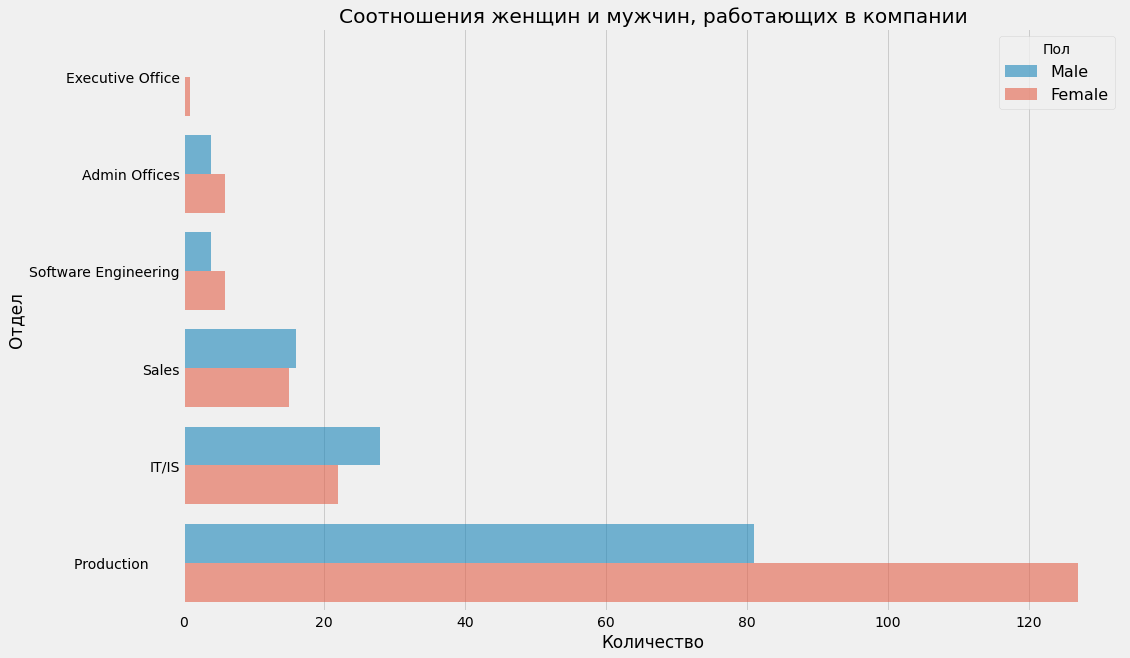

In [237]:
# построение графика
figure, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = employee_by_sex\
            , x='employee_count'\
            , y='department'\
            , hue='sex'
            , hue_order=['Male', 'Female']\
            , alpha=0.6\
            , ax=ax)

ax.set_title('Соотношения женщин и мужчин, работающих в компании')
ax.set_xlabel('Количество')
ax.set_ylabel('Отдел')
ax.legend(loc=1, fontsize=16, title='Пол')

In [242]:
pd.read_sql('SELECT racedesc, COUNT(id) as employee_count\
            FROM hr_dataset\
            GROUP BY racedesc\
            ORDER BY employee_count', connect)

,racedesc,employee_count
0,American Indian or Alaska Native,4
1,Hispanic,4
2,Two or more races,18
3,Asian,34
4,Black or African American,57
5,White,193


In [243]:
# группировка сотрудников по отделам и расам
employee_by_race = pd.read_sql('SELECT department, racedesc, COUNT(id) as employee_count\
            FROM hr_dataset\
            GROUP BY department, racedesc\
            ORDER BY employee_count', connect)

# список уникальных рас
racedesc_list = pd.read_sql('SELECT DISTINCT(racedesc) as racedesc\
                            FROM hr_dataset\
                            ORDER BY racedesc DESC', connect).racedesc

employee_by_race

,department,racedesc,employee_count
0,Executive Office,White,1
1,Sales,American Indian or Alaska Native,1
2,Sales,Asian,1
3,IT/IS,Hispanic,1
4,Software Engineering,Asian,2
5,IT/IS,Two or more races,2
6,Admin Offices,Asian,2
7,Admin Offices,Black or African American,3
8,Production,Hispanic,3
9,Software Engineering,Black or African American,3


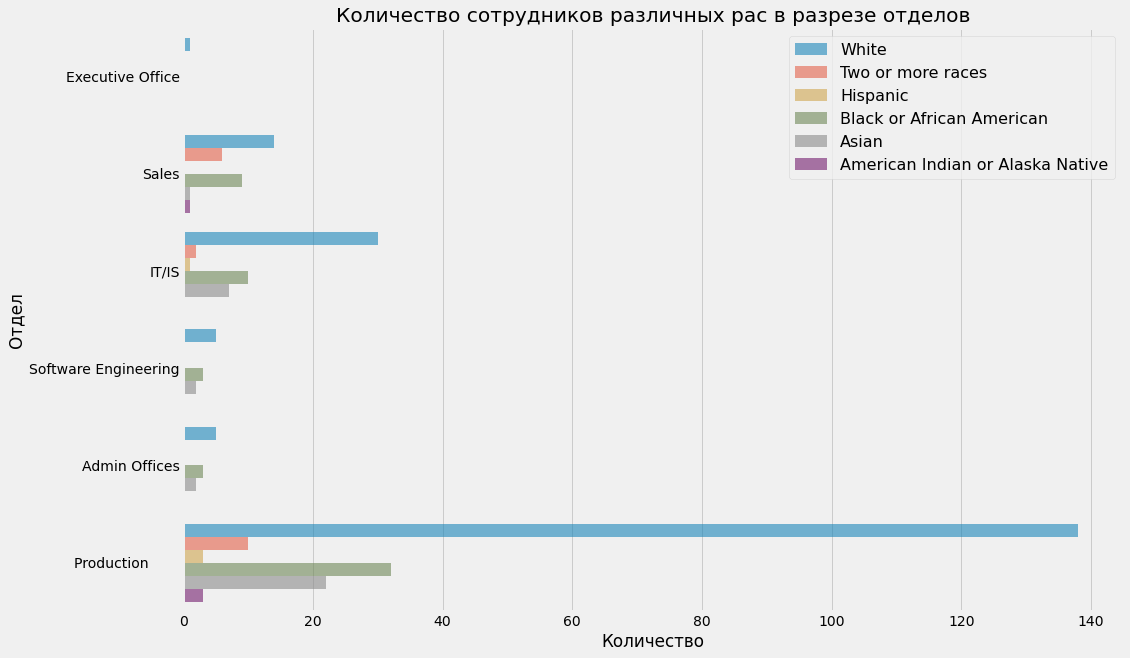

In [229]:
# построение графика
figure, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = employee_by_race\
            , x='employee_count'\
            , y='department'\
            , hue='racedesc'\
            , hue_order=racedesc_list\
            , alpha=0.6\
            , ax=ax)

ax.set_title('Количество сотрудников различных рас в разрезе отделов')
ax.set_xlabel('Количество')
ax.set_ylabel('Отдел')
ax.legend(loc=1, fontsize=16)

#### Количество сотрудников в разных штатх

In [119]:
pd.read_sql('SELECT state, COUNT(id) AS employee_count\
            FROM hr_dataset\
            GROUP BY state\
            ORDER BY employee_count DESC', connect, index_col = ['state'])

,employee_count
state,
MA,275
CT,6
TX,3
VT,2
NV,1
KY,1
OH,1
NY,1
IN,1


#### Рассмотрев основные данные о сотрудниках мы можем сделать следующие выводы:
1. Большинство наших сотрудников работает в производственном отделе
2. Минимальный возраст 25 лет, максимальный 67, средний 39 лет. Это говорит о том, что в компании много людей среднего и старшего возраста и мало молодежи. Скорее всего у нас в компании нет студентов, так как минимальный возраст 25 лет. Возможно стоит разработать проект для привлечения молодых специалистов. 
3. В компании работает больше женщин (177), чем мужчин (133). Эта тенденция наблюдается по всем отделам, кроме Продаж (Sales) и ИТ (IT/IS). В ИТ традиционно работает большинство мужчин, но важно обратить внимание, что в нашей компании перевес не высокий: 22 женщины и 28 мужчин.
4. Так же мы можем отметить что большинство наших сотрудников относятся к "белой" расе (193), второе место занимают "черные и афроамериканцы" (57). Это связано с тем, что почти все сотрудники проживают в штате Массачусетс. Это северный штат, где доля "белого" населения составляет 71%.

## 2 Оценка результатов работы сотрудников
Рассмотрим, каке параметры влияют на оценку работы сотрудника

#### Зависимость отценки результатов работы сотрудника от руководителя

Выясним зависит ли результат работы сотрудника от его руководителя.
Обратим внимание на то, что в нашей компании у разных подразделений может быть один руководитель. Поэтому нам интересно, посмотреть оценку сотрудников, не только в разрезе руководителей, но и в разрезе подразделений. 
Возможно, у одного и тоже руководителя разные результаты в различных подразделениях. 

Рассмотрим какие оценки есть у сотрудников, заметим, что у каждой оценки, есть числовой эквивалент 1-5, где 5 - высокая оценка, 1 - низкая оценка. Будем использовать его для нахождения среднего значения. Также обратим внимание, что есть две оценки:
- "90-day meets" - 0
- "N/A- too early to review" - 9

такие оценки даются сотрудникам, результаты работы которых еще не возможно оценить. Мы исключим их из нашей выборки. 

In [212]:
pd.read_sql('SELECT DISTINCT("Performance Score", "perf_scoreid") FROM hr_dataset', connect)

,row
0,"(""90-day meets"",0)"
1,"(Exceeds,4)"
2,"(Exceptional,5)"
3,"(""Fully Meets"",3)"
4,"(""N/A- too early to review"",9)"
5,"(""Needs Improvement"",2)"
6,"(PIP,1)"


In [210]:
# список все подразделений
departments_list = list(pd.read_sql('SELECT DISTINCT("department") FROM hr_dataset', connect).department)
departments_list

['Production       ',
 'Admin Offices',
 'IT/IS',
 'Executive Office',
 'Software Engineering',
 'Sales']

In [211]:
# функция для выгрузки датасета по определенному отделу
def df_department_score_by_menedger(department_name):
    return pd.read_sql('SELECT "Manager Name" "manager_name", "department", AVG("perf_scoreid") "avg_score"\
                FROM hr_dataset\
                WHERE "perf_scoreid" not in (0, 9)\
                AND "department" = %s\
                GROUP BY  "manager_name", "department" '\
                ,connect, params = (department_name,), index_col='manager_name')

# средняя оценка по всем сотрудникам
mean_score = pd.read_sql('SELECT AVG("perf_scoreid") "avg_score"\
                         FROM hr_dataset\
                         WHERE "perf_scoreid" not in (0, 9)'\
                         , connect).iloc[0][0]


Text(0.5, 0, 'Имя руководителя')

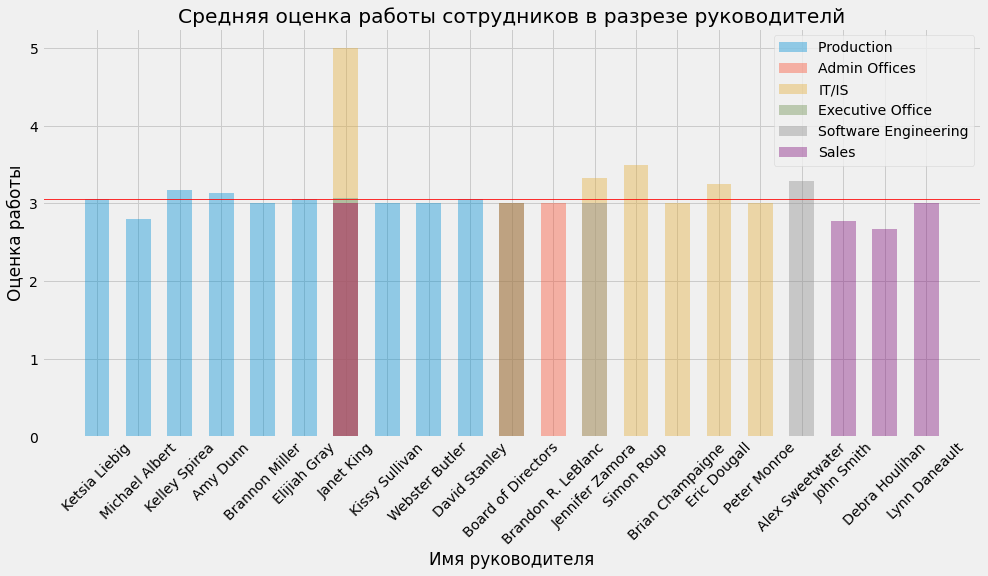

In [216]:
figure, ax = plt.subplots(figsize=(15,7))
for i_department in departments_list:
    cur_df = df_department_score_by_menedger(i_department)
    ax.bar(x=cur_df.index, height=cur_df.avg_score, alpha=0.4, label=i_department, width=0.6,)
    ax.legend()
    ax.tick_params(axis = 'x', rotation = 45)
    
ax.axhline(y=mean_score, color='r', linewidth=0.8)
ax.set_title('Средняя оценка работы сотрудников в разрезе руководителй')
ax.set_ylabel('Оценка работы')
ax.set_xlabel('Имя руководителя')




In [326]:
# чтобы выяснить, почему в подразделении IT/IS средняя оценка 5,
# проверим сколько сотрудников работают в этом подрахделении в подчинении Janet King
pd.read_sql('SELECT count(*) as count_employees\
            FROM hr_dataset\
            WHERE department = %s and "Manager Name" = %s ', connect, params=('IT/IS', 'Janet King'))

,count_employees
0,1


#### Зависиомть оценки работы сотрудника от стажа в компании

In [262]:
# групировка сотрудников по отделам, нахождение среднего стажа в годах
pd.read_sql('SELECT department, AVG("Days Employed")/365.3 as years_employed\
            FROM hr_dataset\
            WHERE perf_scoreid < 3\
            GROUP BY department', connect)

,department,years_employed
0,Admin Offices,2.775801
1,IT/IS,2.745688
2,Software Engineering,4.004927
3,Sales,3.609818
4,Production,3.324360


In [276]:
# средний стаж сотрудников в годах в группировке по оценке
score_by_seniority = pd.read_sql('SELECT perf_scoreid, AVG("Days Employed")/365.3 as avg_years\
            FROM hr_dataset\
            WHERE perf_scoreid not in (0, 9)\
            GROUP BY perf_scoreid\
            ORDER BY perf_scoreid', connect)

# средняя оценка работы сотрудников
avg_score = pd.read_sql('SELECT AVG(perf_scoreid) as avg_perf_scoreid\
            FROM hr_dataset\
            WHERE perf_scoreid not in (0, 9)', connect).iloc[0][0]

score_by_seniority

,perf_scoreid,avg_years
0,1,3.906074
1,2,3.739027
2,3,3.847681
3,4,4.455047
4,5,4.657359


Text(0, 0.5, 'Средний стаж в годах')

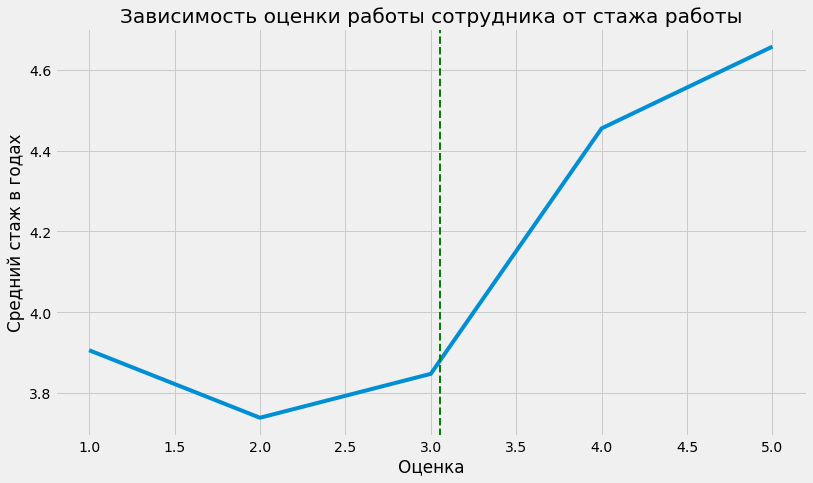

In [277]:
figure, ax = plt.subplots(figsize=(12,7))
ax.plot(score_by_seniority.perf_scoreid, score_by_seniority.avg_years)

ax.axvline(avg_score, color = 'green', linewidth = 2, linestyle = '--')
ax.set_title('Зависимость оценки работы сотрудника от стажа работы')
ax.set_xlabel('Оценка')
ax.set_ylabel('Средний стаж в годах')


#### Оценка работы производственного персонала
Рассмотрим:
- распределение частоты ошибок
- зависимость частоты ошибок от стажа работника

Text(0, 0.5, 'Кол-во записей')

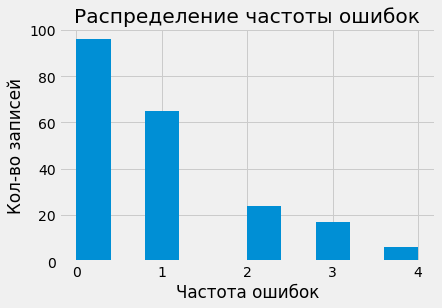

In [296]:
daily_error_rate = pd.read_sql('SELECT "Daily Error Rate" \
            FROM production_staff\
            WHERE "Employee Name" IS NOT null\
            AND "Daily Error Rate" IS NOT null' , connect)

plt.hist(daily_error_rate)
plt.title('Распределение частоты ошибок')
plt.xlabel('Частота ошибок')
plt.ylabel('Кол-во записей')

In [318]:
# среднее количество ошибок производтвенного персонала в зависимости от стажа
error_by_seniority = pd.read_sql('SELECT ROUND("Days Employed"/365.3) as years, AVG("Daily Error Rate") as avg_error\
                                 FROM production_staff p\
                                 JOIN hr_dataset h ON p."Employee Name" = h."Employee Name"\
                                 WHERE p."Employee Name" IS NOT null\
                                 AND "Daily Error Rate" IS NOT null\
                                 GROUP BY years\
                                 ORDER BY years', connect)

error_by_seniority

,years,avg_error
0,0.0,1.111111
1,1.0,1.160000
2,2.0,0.941176
3,3.0,0.918919
4,4.0,0.823529
5,5.0,1.090909
6,6.0,0.695652
7,7.0,0.333333
8,8.0,0.000000
9,9.0,0.000000


Text(0, 0.5, 'Кол-во ошибок в день')

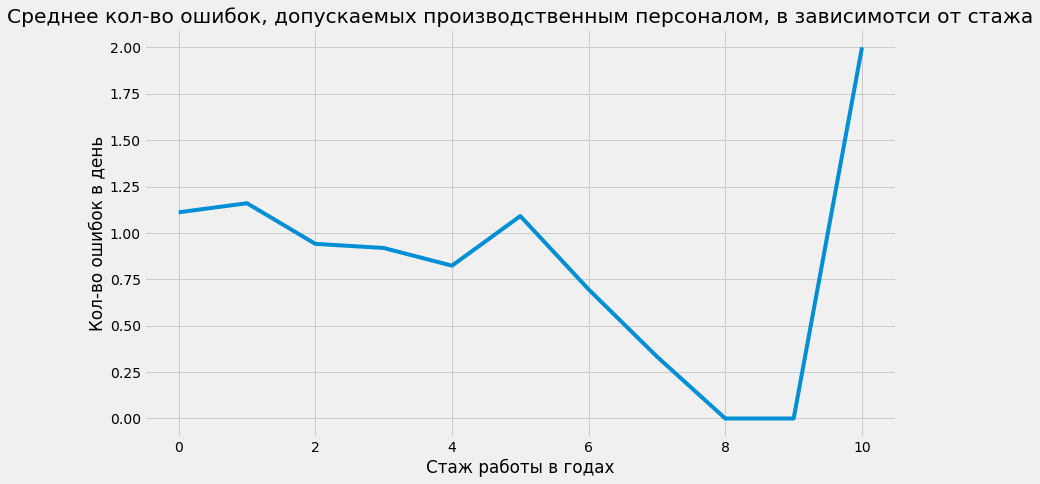

In [321]:
# строим гарфик
figure, ax = plt.subplots(figsize=(12,7))
ax.plot(error_by_seniority.years, error_by_seniority.avg_error)
ax.set_title('Среднее кол-во ошибок, допускаемых производственным персоналом, в зависимотси от стажа')
ax.set_xlabel('Стаж работы в годах')
ax.set_ylabel('Кол-во ошибок в день')

#### Проанализировав оценку работы сотрудников, мы можем сделать следующие выводы:
1. Оценка результативности сотрудника в нашей компании не зависит от руководителя. Кроме этого мы видим, что результаты работы сотрудников разных отделов под руководством одно и того же руководителя отличается.  
    Например, сотрудники в подчинении Janet King в подразделении Sales в среднем имеют оценку 3 бала, а в подразделении IT/IS 5 балов.
    Кроме этого мы можем обратить внимание, что средняя оценка по всем руководителям очень приближена к средней оценке в целом. Это говорит о, том что работа сотрудников не связана с принципами руководства.
    Проверив сколько сотрудников находятся в подразделении IT/IS в подчинении Janet King, мы понимаем, что средняя отличная оценка связана с тем, что там работает только один человек, который имеет оценку 5.
    
2. Оценка работы сотрудника зависит от его стажа. Чем выше стаж, тем более высокую оценку получает работник. Это может говорить о том, что стаж гарантирует экспертность работника. 

3. Оценка работы производственного персонала, показывает, что чем больше стаж сотрудника, тем меньше ошибок в течение дня он допускает. 

## 3 Мотивация сотрудников
Рассмотрим основные показатели, которые могут раскрыть мотивацию наших сотрудников:
1. Влияние возраста на стаж
2. Зависимость стажа от семейного положения 
2. Влияние заработной платы на стаж
4. Частота причин увольнения

####  Зависимоть продолжительности работы в компании от возраста сотрудника
Выясним зависит ли продолжительность работы в компании от возраста сотрудника. Выборку ограничим только уволенными сотрудниками. 

In [329]:
# средний стаж с группировкой по ворзрасту
avg_seniority_by_age = pd.read_sql('SELECT age, AVG("Days Employed")/365.3 "mean_period" \
                            FROM hr_dataset \
                            WHERE "Date of Termination" is not null\
                            GROUP BY age \
                            ORDER BY age'\
                            , connect)
# средний стаж
avg_seniority = pd.read_sql('SELECT AVG("Days Employed")/365.3\
                            FROM hr_dataset\
                            WHERE "Date of Termination" is not null'\
                            , connect).iloc[0][0]
# минимальный стаж
min_seniority = pd.read_sql('SELECT MIN("Days Employed")/365.3\
                            FROM hr_dataset\
                            WHERE "Date of Termination" is not null'
                            , connect).iloc[0][0]
# максимальный стаж
max_seniority = pd.read_sql('SELECT MAX("Days Employed")/365.3\
                            FROM hr_dataset\
                            WHERE "Date of Termination" is not null'
                            , connect).iloc[0][0]

avg_seniority_by_age

,age,mean_period
0,26,2.173556
1,27,1.201752
2,28,0.938042
3,29,1.255589
4,30,1.997445
5,31,1.572680
6,32,2.797701
7,33,2.216899
8,34,1.544328
9,35,3.567844


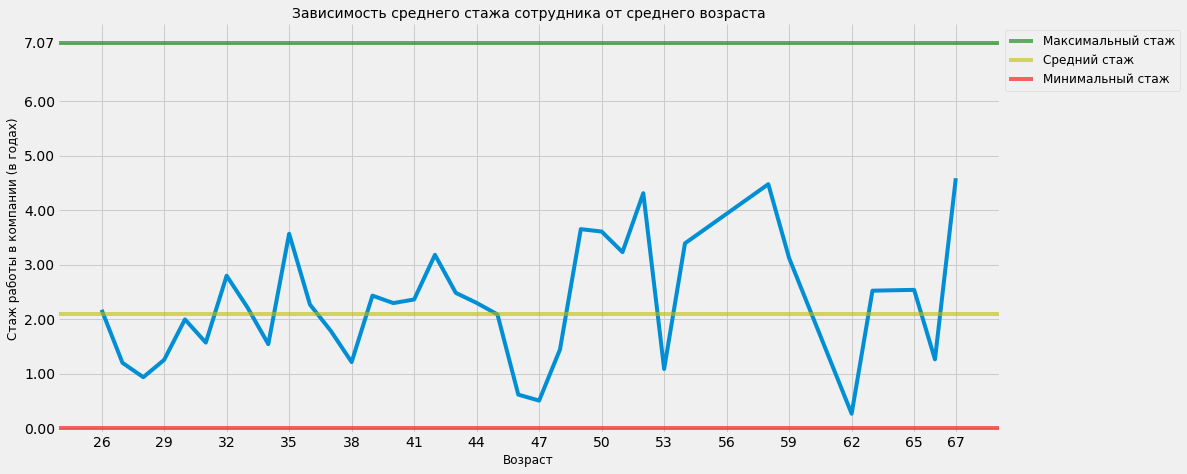

In [333]:
# построим график
figure, ax = plt.subplots(figsize = (15, 7))
ax.plot(avg_seniority_by_age.age, avg_seniority_by_age.mean_period)



min_age = avg_seniority_by_age.age.min()
max_age = avg_seniority_by_age.age.max()

x_range = list(range(min_age, max_age, 3)) + [max_age]
y_range = list(range(int(min_seniority), int(max_seniority))) + [max_seniority]



ax.axhline(y=max_seniority, color='g', alpha=0.6, label='Максимальный стаж')
ax.axhline(y=avg_seniority, color='y', alpha=0.6, label='Средний стаж')
ax.axhline(y=min_seniority, color='r', alpha=0.6, label='Минимальный стаж')

ax.set_title('Зависимость среднего стажа сотрудника от среднего возраста', size=14)
ax.set_xlabel('Возраст', size=12)
ax.set_ylabel('Стаж работы в компании (в годах)', size=12)
ax.set_xticks(x_range)
ax.set_yticks(y_range)
ax.legend(loc=0, bbox_to_anchor=(1, 1), fontsize=12)
plt.box(on = None)


Таким образом мы видим, что возраст сотрудника не значительно влияет на стаж.

Одновременно с тем как и молодой специалист (26-29 лет) может проработать в компании менее года, так и в среднем (44-47 лет), и в пенсионном возрасте (59-62) люди могут уволиться, не проработав и года. 

Однако можно заметить, что стаж сотрудников от 26 до 44 лет более приближен к среднему, тогда как в возрасте от 47 до 67 довольно большой разброс. Также максимальный средний стаж наблюдается у сотрудников возрастной группы. Это говорит о том, что чем старше человек, тем менее он готов к смене работы  

#### Зависимость между семейным положением и продолжительностью работы сотрудника
Рассмотрим зависит ли продолжительность работы от семейного положения сотрудника
- Widowed - вдовец/вдова
- Married - женат/замужем
- Separated - в ожидании развода
- Single - не женат/не замужем
- Divorced - разведен(а)

In [362]:
pd.read_sql('SELECT DISTINCT(maritaldesc) from hr_dataset', connect)

,maritaldesc
0,Widowed
1,Married
2,Separated
3,Single
4,Divorced


In [334]:
# минимальный, максимальный, средний стаж работы сгруппировонный по семейному положению
marital_status_by_seniority = pd.read_sql('SELECT "maritaldesc" marital_status\
                            , MIN("Days Employed")/365.3 min_seniority\
                            , AVG("Days Employed")/365.3 avg_seniority\
                            , MAX("Days Employed")/365.3 max_seniority\
                                          FROM hr_dataset \
                                          GROUP BY marital_status\
                                          ORDER BY avg_seniority', connect)

avg_seniority_min = int(marital_status_by_seniority.min_seniority.min())
avg_seniority_max = int(marital_status_by_seniority.max_seniority.max())

marital_status_by_seniority

,marital_status,min_seniority,avg_seniority,max_seniority
0,Widowed,0.005475,2.362442,4.385437
1,Divorced,0.021900,3.019071,7.352861
2,Married,0.005475,3.411541,9.885026
3,Single,0.021900,3.757875,10.057487
4,Separated,2.477416,4.663062,11.877909


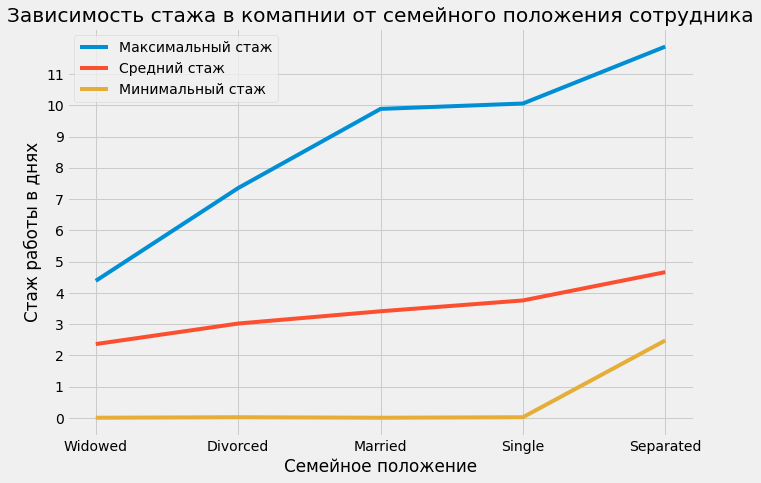

In [336]:
# построим график
figure, ax = plt.subplots(figsize=(10,7))

y_range = list(range(int(avg_seniority_min), int(avg_seniority_max))) + [avg_seniority_max]

ax.plot(marital_status_by_seniority.marital_status, marital_status_by_seniority.max_seniority, label='Максимальный стаж' )
ax.plot(marital_status_by_seniority.marital_status, marital_status_by_seniority.avg_seniority, label='Средний стаж')
ax.plot(marital_status_by_seniority.marital_status, marital_status_by_seniority.min_seniority, label='Минимальный стаж')


ax.set_yticks(y_range)
ax.set_ylabel('Стаж работы в днях')
ax.set_xlabel('Семейное положение')
ax.set_title('Зависимость стажа в комапнии от семейного положения сотрудника')
ax.legend()



Рассмотрев зависимость продолжительности работы в компании от семейного положения, можно сделать вывод, что дольше всего в компании работают люди, которые находятся в процессе развода, в среднем около 5 лет. Это может говорить о том, что люди в процессе развода, стараются стабилизировать свою жизнь и менее склоны менять работу. 

На втором месте "одиночки", на третьем женатые/замужние. Средний стаж этих групп составляет около 3.5 года. 
Это важные данные, они подчеркивают, что семейное положение не может быть решающим фактором принятия решения о приеме на работу нового сотрудника.

### Зависимость стажа сотрудника от заработной платы. 
Рассмотрим, зависит ли стаж от суммы заработной платы.

Так как заработная плата в нашей компании привязана к должности сотрудника, то сначала сгруппируем по должности, а потом посмотрим на средние зарплаты. 
В таблице salary_grid есть только часть данных по должностям и зарплатам сотрудников. Рассмотрим зависимость на тех данных, что у нас есть. 

In [361]:
seniority_by_salary = pd.read_sql('SELECT position, AVG("Days Employed")/365 avg_seniority, "Hourly Mid" avg_salary\
            FROM hr_dataset \
            JOIN salary_grid ON "Position" = "position" \
            GROUP BY position, avg_salary\
            ORDER BY avg_seniority'\
            , connect)
seniority_by_salary

,position,avg_seniority,avg_salary
0,Sr. DBA,1.369178,55.77
1,Administrative Assistant,1.578082,19.23
2,Database Administrator,2.012013,32.84
3,Network Engineer,2.550381,32.14
4,Sr. Network Engineer,2.642192,47.82
5,Production Technician II,3.017063,23.08
6,Production Technician I,3.725342,19.23
7,Accountant I,5.379909,24.72
8,Sr. Accountant,5.836986,37.01


Text(0, 0.5, 'Средняя заработная плата ($ в час)')

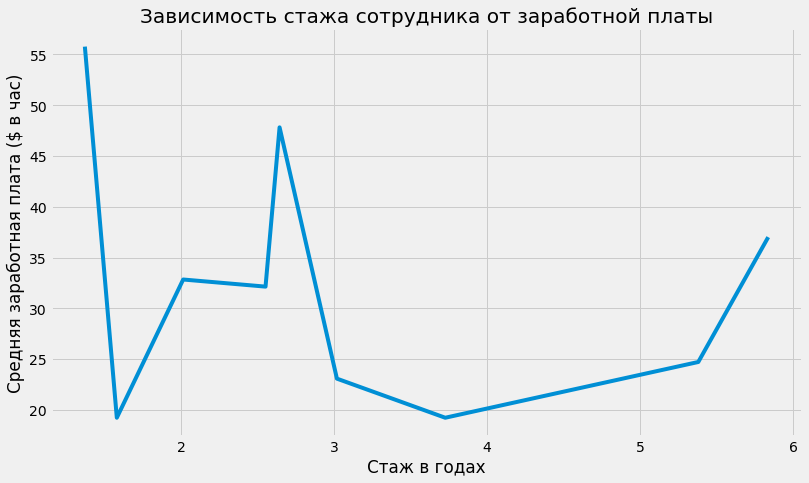

In [353]:
figure, ax = plt.subplots(figsize = (12, 7))
ax.plot(seniority_by_salary.avg_seniority, seniority_by_salary.avg_salary, )
ax.set_title('Зависимость стажа сотрудника от заработной платы')
ax.set_xlabel('Стаж в годах')
ax.set_ylabel('Средняя заработная плата ($ в час)') 


## 4 Частота причин увольнения
Рассмотрим
- самые популярные причины увольнения
- по каким причинам увольнялись сотрудники в зависимости от должности. Возможно, нам удастся выявить проблемные позиции
- сколько лет сотрудники в среднем проработали в компании до увольнения в разрезе должностей (при оценке этого параметра уберем из выборки должности, на которых уволился только один сотрудник, так как по данным позициям нельзя будет сделать однозначный вывод тенденции стажа)

Причины увольнения:
- Another position - перешел на другую должность
- N/A - Has not started yet - нет данных, еще не приступил к работе
- N/A - still employed - нет данных, еще работает
- attendance - проблемы с посещаемостью
- career change - сменил профессию
- gross misconduct - грубые нарушения
- hours - часы работы
- maternity leave - did not return - отпуск по беременности и родам
- medical issues - проблемы со здоровьем
- military - армия
- more money - хочет более высокую оплату труда
- no-call, no-show - отсутствие на работе без уведомления работодателя 
- performance - эффективность, производительность
- relocation out of area - переехал
- retiring - выход на пенсию
- return to school - вернулся к учебе
- unhappy - несчастлив

In [368]:
pd.read_sql('SELECT DISTINCT("Reason For Term") reason_for_term\
            FROM hr_dataset\
            ORDER BY reason_for_term', connect)

,reason_for_term
0,Another position
1,N/A - Has not started yet
2,N/A - still employed
3,attendance
4,career change
5,gross misconduct
6,hours
7,maternity leave - did not return
8,medical issues
9,military


In [413]:
pd.read_sql('SELECT "Reason For Term" reason_for_term, COUNT(id) employees_count\
             FROM hr_dataset\
             WHERE "Reason For Term" NOT IN (%s, %s)\
             GROUP BY reason_for_term\
             ORDER BY employees_count'\
            , connect\
            , params=('N/A - still employed', 'N/A - Has not started yet'))\
                            

,reason_for_term,employees_count
0,gross misconduct,1
1,medical issues,3
2,maternity leave - did not return,3
3,"no-call, no-show",3
4,retiring,4
5,performance,4
6,military,4
7,relocation out of area,5
8,return to school,5
9,attendance,7


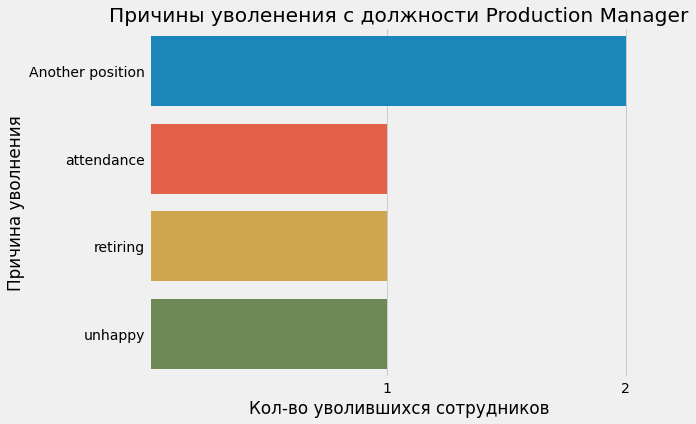

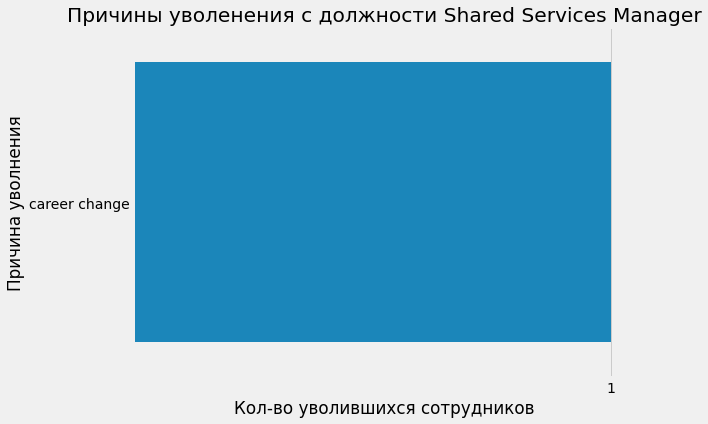

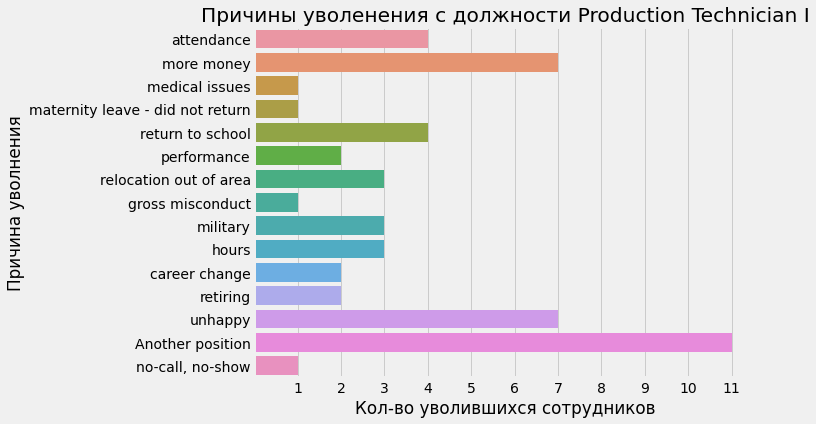

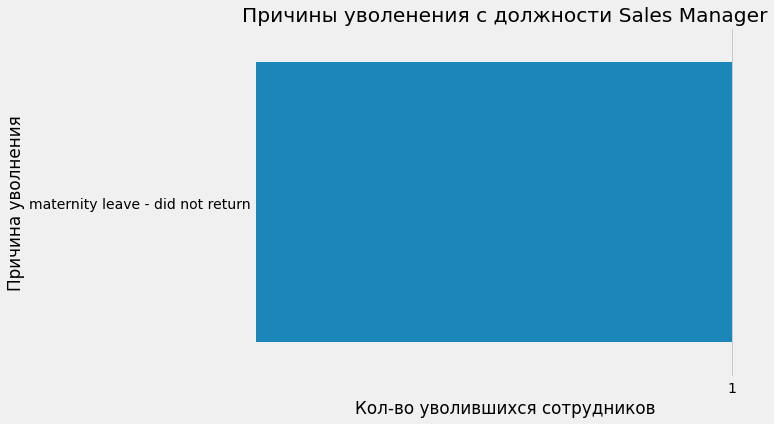

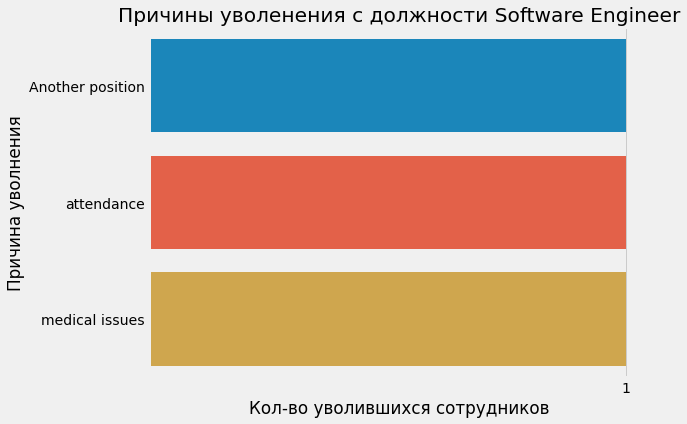

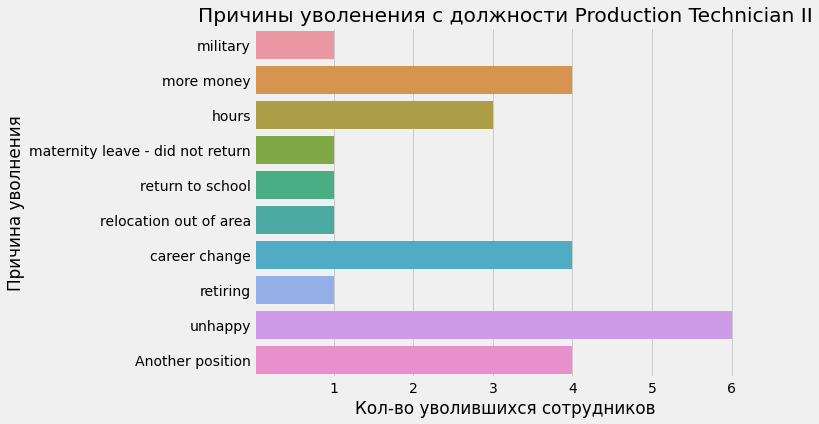

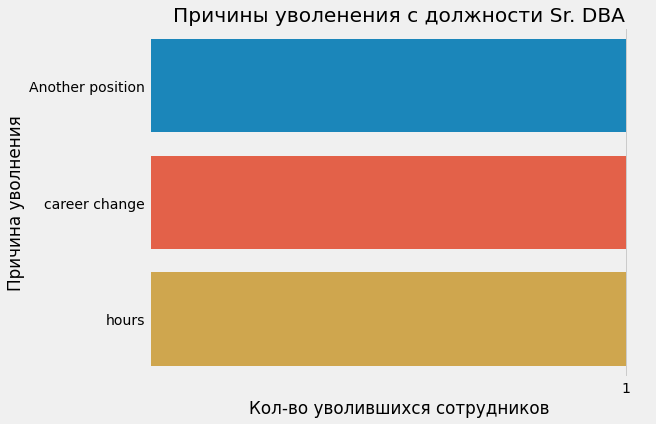

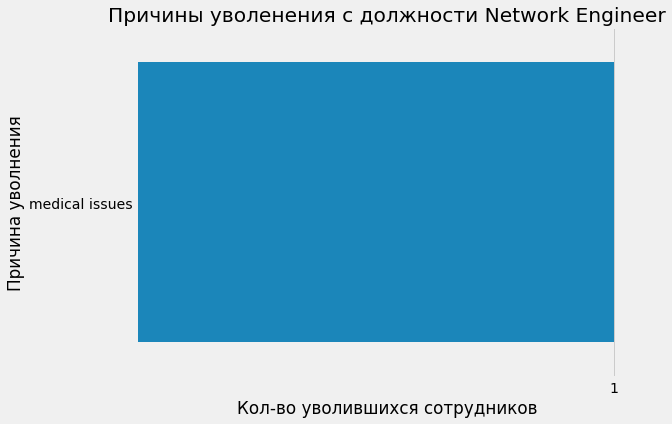

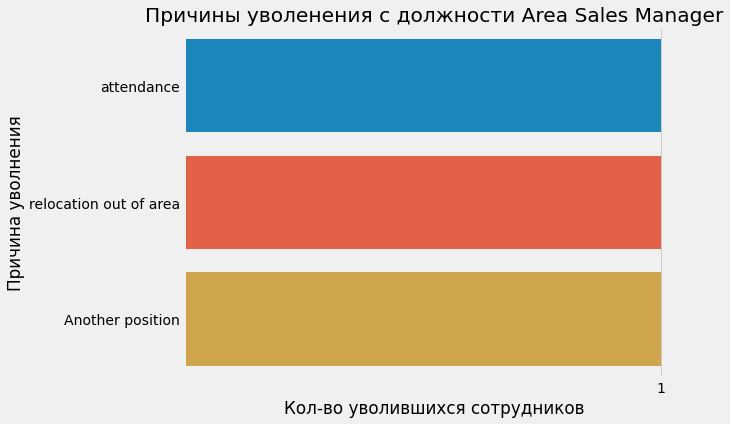

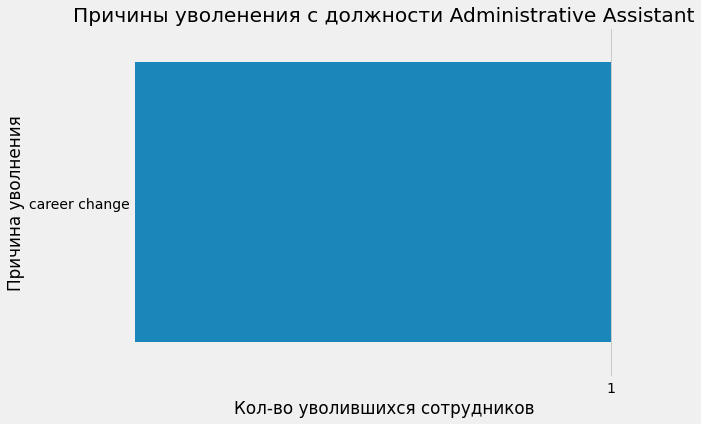

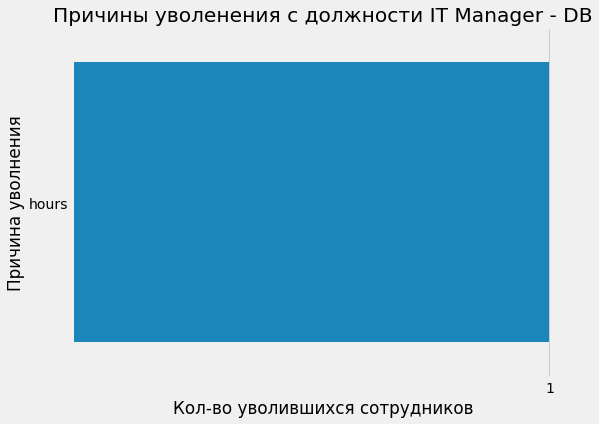

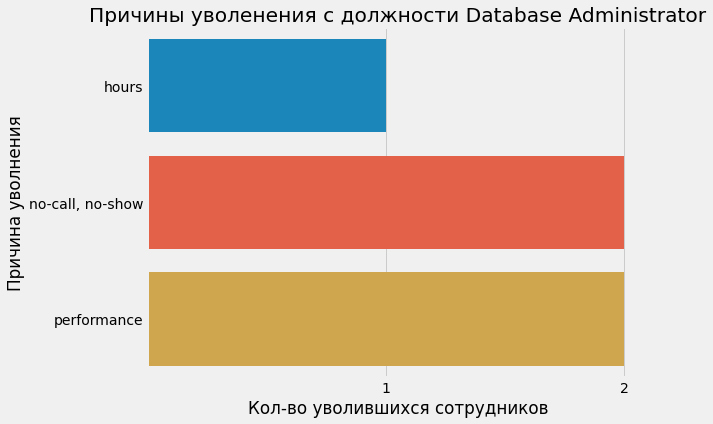

In [389]:
# список уникальных должностей для цикла
list_of_positions = pd.read_sql('SELECT DISTINCT(position)\
                                FROM hr_dataset\
                                WHERE "Reason For Term" NOT IN (%s, %s)'\
                                , connect\
                                , params=('N/A - still employed', 'N/A - Has not started yet'))\
                                .position

# проходимся циклом по списку должностей
for i_position in list_of_pozitions:
# выгружаем датасет для каждой должности: причина уволнения - кол-во сторудников
    df_reason_for_term = pd.read_sql('SELECT "Reason For Term" reason_for_term, COUNT(id) employees_count\
            FROM hr_dataset\
            WHERE "Reason For Term" NOT IN (%s, %s)\
            AND position = %s\
            GROUP BY reason_for_term'\
            , connect, params=('N/A - still employed', 'N/A - Has not started yet', i_position))
# создаем экземпляры классов Figure и Axis
    figure, ax = plt.subplots(figsize=(8,6))
# строим график   
    sns.barplot(data=df_reason_for_term
            , x='employees_count'
            , y='reason_for_term'
            , ax=ax)
# настраиваем параметры графика   
    ax.set_title('Причины уволенения с должности {}'.format(i_position))
    ax.set_xlabel('Кол-во уволившихся сотрудников')
    ax.set_ylabel('Причина уволнения') 
    x_range = list(range(df_reason_for_term.employees_count.min(), df_reason_for_term.employees_count.max()+1))
    ax.set_xticks(x_range)

In [409]:
# находим средний стаж уволившихся сотрулников по должностям
seniority_terminated = pd.read_sql('SELECT position, AVG("Days Employed")/365.3 avg_seniority, COUNT(id)\
            FROM hr_dataset\
            WHERE "Date of Termination" IS NOT NULL\
            GROUP BY position\
            HAVING COUNT(id) > 1\
            ORDER BY avg_seniority ', connect)
seniority_terminated

,position,avg_seniority,count
0,Database Administrator,0.701341,5
1,Administrative Assistant,1.078566,2
2,Sr. DBA,1.355051,3
3,Production Technician II,1.670808,26
4,Software Engineer,2.359704,3
5,Production Technician I,2.377129,52
6,Area Sales Manager,2.593302,3
7,Production Manager,2.638379,5


Text(0, 0.5, 'Должность')

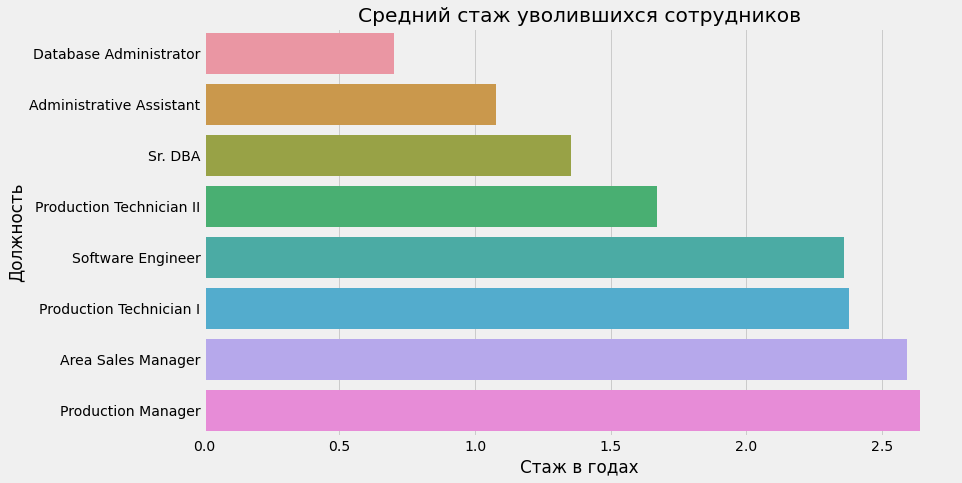

In [414]:
# строим график
figure, ax = plt.subplots(figsize=(12,7))
sns.barplot(data = seniority_terminated, x='avg_seniority', y='position', ax=ax)
ax.set_title('Средний стаж уволившихся сотрудников')
ax.set_xlabel('Стаж в годах')
ax.set_ylabel('Должность')

Рассмотрев причины увольнения сотрудников, можно сделать следующие выводы:
1. Самая популярная причина увольнения - это смена позиции. 20 человек сменили должность. Это очень хороший показатель, он говорит, о том, что сотрудникам нравится работать в нашей компании и они получают повышение либо переходят на другую должность, но не меняют место работы.

    С другой стороны вторая по популярности причина увольнения - это ощущения несчастья от работы. 14 человек ушли из компании по этой причине. Это может говорить как о проблемах на рабочем месте, так и об изначально неверном выборе профессии. Почти все эти сотрудники работали в производственном отделе. 7 человек уволилось по этой причине с должности Production Technician I и еще 6 с Production Technician II. Это может говорить о тяжелых условиях труда для производственного персонала.

    Третья по популярности причина увольнения - это желания получать более высокую заработную плату. И она опять характерна для производственного персонала. В сочетании со второй причиной это подтверждает то, что сотрудники считают работу на производственных должностях тяжелой, не приносящей удовольствия и малооплачиваемой.


2. Только один сотрудник был уволен по причине допущения грубого нарушения


3. Мы можем отметить, что Руководители производства (Production Manager) наиболее долго работают в компании до увольнения - в среднем более 2.5 лет. Также двое из пять уволившихся сотрудников сменили должность, но остались в компании.


4. Особое внимание стоит уделить должности Администратора БД (Database Administrator). Сотрудники на этой позиции в среднем работают менее года, а причины их увольнения говорят о том, что персонала был подобран некачественно. Из пяти уволившихся сотрудников двое показали низкую эффективность, еще двое без уведомления не выходили на работу и один уволился из-за часов работы (hours - скорее всего имеется ввиду не рабочее время, а нагрузка, кол-во часов). Таким образом необходимо уделить особое внимание подбору сотрудников на данную позицию. 

## 5 Анализ трат на рекрутинг
Проверим насколько были оправданы затраты на рекрутинг.

Найдем: 
- затраты на привлечение одного сотрудника по каждому ресурсу
- количество привлеченных сотрудников

In [470]:
# группируем затраты по количеству сотрудников и считаем сколько стоил один сотрудник
employee_source_cost = pd.read_sql('SELECT h."Employee Source" as employee_source\
            , "Total" as cost\
            , COUNT(h.id) as employees_count\
            , "Total" / COUNT(h.id) as price_per_employee \
            FROM hr_dataset h\
            JOIN recruiting_costs r ON h."Employee Source" = r."Employment Source"\
            GROUP BY employee_source, cost\
            ORDER BY price_per_employee DESC', connect)
employee_source_cost

,employee_source,cost,employees_count,price_per_employee
0,Careerbuilder,7790,1,7790
1,Pay Per Click,1323,1,1323
2,MBTA ads,10980,17,645
3,On-campus Recruiting,7500,12,625
4,Website Banner Ads,7143,13,549
5,Social Networks - Facebook Twitter etc,5573,11,506
6,Newspager/Magazine,8291,18,460
7,Other,3995,9,443
8,Billboard,6192,16,387
9,Diversity Job Fair,10021,29,345


Text(0, 0.5, 'Название ресурса')

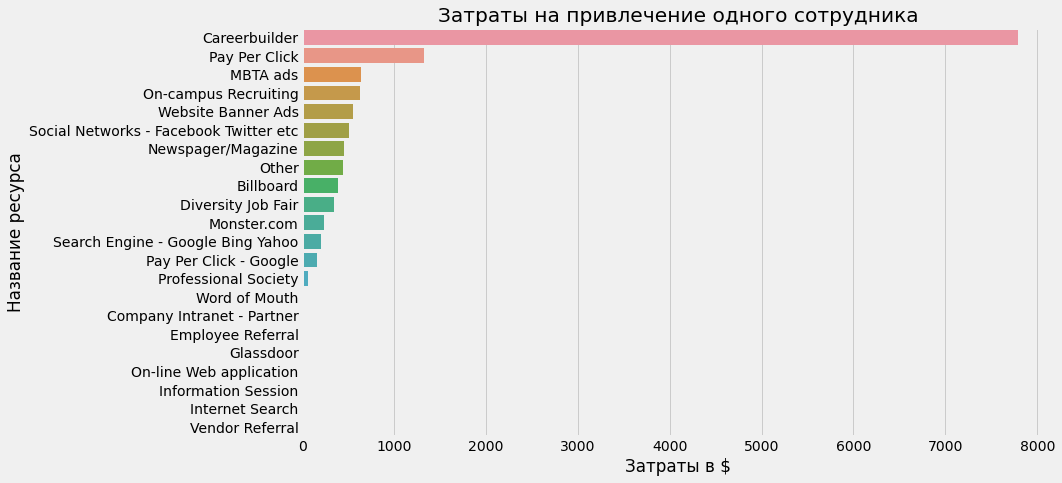

In [476]:
# строим график затрат на привлечение одного сотрудника
figure, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=employee_source_cost, x='price_per_employee', y='employee_source')
ax.set_title('Затраты на привлечение одного сотрудника')
ax.set_xlabel('Затраты в $')
ax.set_ylabel('Название ресурса')
 

Text(0, 0.5, 'Название ресурса')

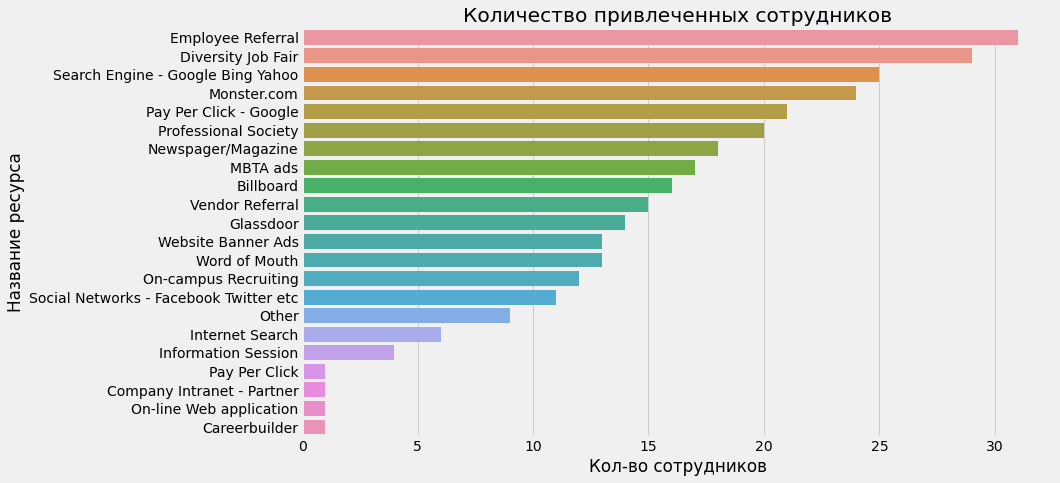

In [477]:
# строим график количества привлеченных сотрудников
figure, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=employee_source_cost.sort_values(by='employees_count', ascending=False)\
            , x='employees_count'\
            , y='employee_source')
ax.set_title('Количество привлеченных сотрудников') 
ax.set_xlabel('Кол-во сотрудников')
ax.set_ylabel('Название ресурса')

In [483]:
# находим кол-во привлеченных сотрудников c нуливыми затратами на рекрутинг с группировкой по ресурсам
employee_source_cost_none = pd.read_sql('SELECT h."Employee Source" as employee_source, COUNT(h.id) as employees_count\
            FROM hr_dataset h\
            JOIN recruiting_costs r ON h."Employee Source" = r."Employment Source"\
            WHERE "Total" = 0\
            GROUP BY employee_source \
            ORDER BY employees_count DESC', connect)
employee_source_cost_none

,employee_source,employees_count
0,Employee Referral,31
1,Vendor Referral,15
2,Glassdoor,14
3,Word of Mouth,13
4,Internet Search,6
5,Information Session,4
6,On-line Web application,1
7,Company Intranet - Partner,1


Text(0, 0.5, 'Название ресурса')

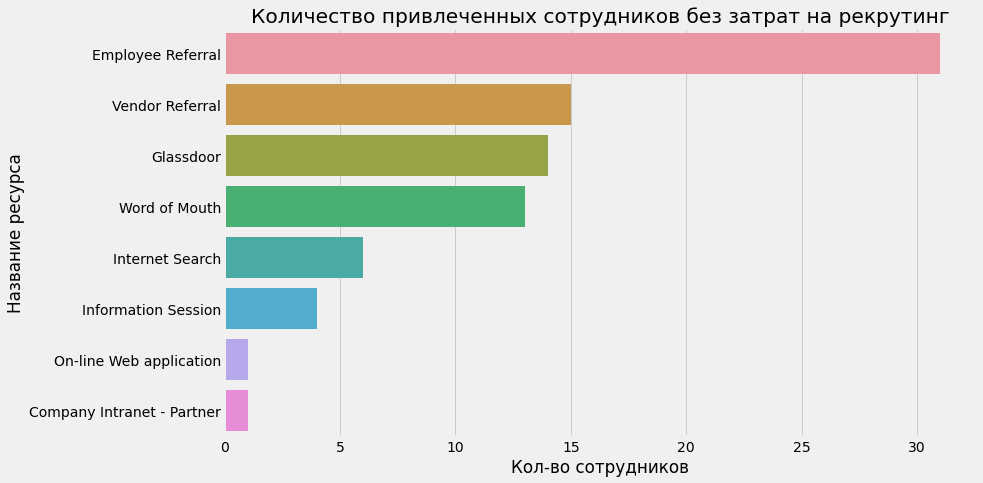

In [485]:
# строим график количества привлеченных сотрудников c нулевыми затратами на рекрутинг
figure, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=employee_source_cost_none\
            , x='employees_count'\
            , y='employee_source')
ax.set_title('Количество привлеченных сотрудников без затрат на рекрутинг') 
ax.set_xlabel('Кол-во сотрудников')
ax.set_ylabel('Название ресурса')

Рассмотрев затраты на рекрутинг мы можем сделать следующие выводы:


1. Наименее эффективно вкладывать средства в ресурс Careerbuilder. Затраты на привлечение одного сотрудника составили почти 8000 \$


2. Наиболее выгодно для привлечения специалистов работают рекомендации сотрудников. Компания не понесла затрат, но наняла 31 сотрудника через рекомендации. Это также подчеркивает наш вывод о том, что сотрудникам нравится работать в нашей компании и они рекомендуют ее другим.


3. Также из выгодных ресурсов можно выделить следующие:
    - Professional Society (20 человек при стоимости 60\$ за одного)
    - Search Engine - Google Bing Yahoo (25 человек при стоимости 207\$ за одного)
    - Monster.com (24 человека при стоимости 240\$ за одного)
    
    
4. Из бесплатных ресурсов наиболее эффективными оказались:
    - Employee Referral - 31 сотрудник
    - Vendor Referral - 15 сотрудник
    - Glassdoor - 14 сотрудников

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [32]:
# импортируем библиотеки
import numpy as np
import json
import urllib.request as req
from datetime import datetime, timedelta
import re

In [33]:
# функция для выгрузки данных из API VK возвращает декодированный ответ с сервера
def get_response(offset):
    token_key = 'some_token_here'
    url = f'https://api.vk.com/method/wall.get?access_token={token_key}&owner_id=-66669811&offset={offset}&count=100&v=5.92' 
    with req.urlopen(url) as session:
            response = session.read().decode()
    return response

#  функция преобразования даты формата unixtime к datetime %Y-%m-%d   
def to_date_format(date_str):
     return  datetime.strptime(datetime.strftime(datetime.fromtimestamp(date_str), '%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')

# функция преобразования даты к формату %Y-%m
def date_to_str_YM(date):
    return datetime.strftime(date, '%Y-%m')


## 1 Описание и начальная работа с данными

1. Выгрузим из API VK датасет для анализа.
    За анализируем период мы возьмем прошедший год с 2022-01-01 по 2022-12-22. В этом периоде мы сможем оценить сезонность интереса аудитории к нашему паблику, так же реально оценить интерес к рубрикам, которые выходят нечасто. Также отчет за прошедший год, поможет нас составить стратегию развития на следующий.

    Так как мы можем за раз выгружать не более 100 записей, в цикле сделаем несколько выгрузок, каждый раз объединяя полученные данные с сервера в общий датасет.


2. Опишем данные, которые получили.


3. Подготовим датасет: ограничим датасет интересующими нас данными и периодом, сохраним рубрики в отдельный столбец.


4. Сделаем воды на основании полученных данных.

####  1. Выгрузим из API VK датасет для анализа

In [36]:
# в цикле объединяем в общий датасет данные, полученные при каждой итерации с сервера,
# изменяя переменную offset, отвечающую за число пропущенных строк для выгрузки
offset = 0 
df_posts = pd.DataFrame()    
for i in range(5):
    response = get_response(offset)
    df = pd.DataFrame(json.loads(response)['response']['items'])
    df_posts = pd.concat([df_posts, df], ignore_index=True)
    offset += 100

df_posts.head()


,id,from_id,owner_id,date,marked_as_ads,is_pinned,comments,attachments,is_favorite,likes,post_source,post_type,reposts,text,views,hash,edited,copy_history
0,278861,-66669811,-66669811,1671206419,0,1.0,"{'can_post': 1, 'count': 2, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': '73...",False,"{'can_like': 1, 'count': 29, 'user_likes': 0, ...",{'type': 'api'},post,"{'count': 7, 'user_reposted': 0}",В новый год — с новой профессией!\n\nСделайте ...,{'count': 10953},OXA530qman_b4PCIUCFF391_I0pP,NaN,NaN
1,279060,-66669811,-66669811,1671791220,0,NaN,"{'can_post': 1, 'count': 0, 'groups_can_post':...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,"{'can_like': 1, 'count': 5, 'user_likes': 0, '...",{'type': 'vk'},post,"{'count': 1, 'user_reposted': 0}",Как придумать хороший слоган?\n\nДа не парьтес...,{'count': 2123},Df6-W0CXzjMI-KZF5J3vpItKvFfD,NaN,NaN
2,279057,-66669811,-66669811,1671781500,0,NaN,"{'can_post': 1, 'count': 0, 'groups_can_post':...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,"{'can_like': 1, 'count': 4, 'user_likes': 0, '...",{'type': 'vk'},post,"{'count': 2, 'user_reposted': 0}","Дед Мороз вот-вот постучится в дверь, а у вас ...",{'count': 3779},PYeauZE2XETqIVkSUTfGXKEo8qrS,NaN,NaN
3,279055,-66669811,-66669811,1671723900,0,NaN,"{'can_post': 1, 'count': 0, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': '05...",False,"{'can_like': 1, 'count': 15, 'user_likes': 0, ...",{'type': 'vk'},post,"{'count': 6, 'user_reposted': 0}","С чего начинается кино? Конечно, со сценария!\...",{'count': 9637},UwAQ2BtpH9oLuas5DvmLy4gMTFlm,NaN,NaN
4,279014,-66669811,-66669811,1671620403,0,NaN,"{'can_post': 1, 'count': 3, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': '4e...",False,"{'can_like': 1, 'count': 13, 'user_likes': 0, ...",{'type': 'vk'},post,"{'count': 0, 'user_reposted': 0}",Как учеба?\n\nВместо ответа на этот вопрос пол...,{'count': 13886},yqTMPAVaGyYuj0ve0tQ7557owdXO,NaN,NaN


In [37]:
# приведем дату в датасете к формату datatime
df_posts.set_index('id', inplace = True)
df_posts['date'] = df_posts['date'].apply(to_date_format)

df_posts


,from_id,owner_id,date,marked_as_ads,is_pinned,comments,attachments,is_favorite,likes,post_source,post_type,reposts,text,views,hash,edited,copy_history
id,,,,,,,,,,,,,,,,,
278861,-66669811,-66669811,2022-12-16 17:00:19,0,1.0,"{'can_post': 1, 'count': 2, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': '73...",False,"{'can_like': 1, 'count': 29, 'user_likes': 0, ...",{'type': 'api'},post,"{'count': 7, 'user_reposted': 0}",В новый год — с новой профессией!\n\nСделайте ...,{'count': 10953},OXA530qman_b4PCIUCFF391_I0pP,NaN,NaN
279060,-66669811,-66669811,2022-12-23 11:27:00,0,NaN,"{'can_post': 1, 'count': 0, 'groups_can_post':...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,"{'can_like': 1, 'count': 5, 'user_likes': 0, '...",{'type': 'vk'},post,"{'count': 1, 'user_reposted': 0}",Как придумать хороший слоган?\n\nДа не парьтес...,{'count': 2123},Df6-W0CXzjMI-KZF5J3vpItKvFfD,NaN,NaN
279057,-66669811,-66669811,2022-12-23 08:45:00,0,NaN,"{'can_post': 1, 'count': 0, 'groups_can_post':...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,"{'can_like': 1, 'count': 4, 'user_likes': 0, '...",{'type': 'vk'},post,"{'count': 2, 'user_reposted': 0}","Дед Мороз вот-вот постучится в дверь, а у вас ...",{'count': 3779},PYeauZE2XETqIVkSUTfGXKEo8qrS,NaN,NaN
279055,-66669811,-66669811,2022-12-22 16:45:00,0,NaN,"{'can_post': 1, 'count': 0, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': '05...",False,"{'can_like': 1, 'count': 15, 'user_likes': 0, ...",{'type': 'vk'},post,"{'count': 6, 'user_reposted': 0}","С чего начинается кино? Конечно, со сценария!\...",{'count': 9637},UwAQ2BtpH9oLuas5DvmLy4gMTFlm,NaN,NaN
279014,-66669811,-66669811,2022-12-21 12:00:03,0,NaN,"{'can_post': 1, 'count': 3, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': '4e...",False,"{'can_like': 1, 'count': 13, 'user_likes': 0, ...",{'type': 'vk'},post,"{'count': 0, 'user_reposted': 0}",Как учеба?\n\nВместо ответа на этот вопрос пол...,{'count': 13886},yqTMPAVaGyYuj0ve0tQ7557owdXO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226096,-66669811,-66669811,2021-12-15 16:00:31,0,NaN,"{'can_post': 1, 'count': 10, 'groups_can_post'...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,"{'can_like': 1, 'count': 48, 'user_likes': 0, ...",{'type': 'api'},post,"{'count': 29, 'user_reposted': 0}",Есть и не смотреть YouTube? Бежать и не слушат...,{'count': 16917},ULC-CUHAKOWE4PTGizPKdSTmWZX0,NaN,NaN
226087,-66669811,-66669811,2021-12-15 13:05:22,0,NaN,"{'can_post': 1, 'count': 5, 'groups_can_post':...","[{'type': 'video', 'video': {'access_key': 'f7...",False,"{'can_like': 1, 'count': 21, 'user_likes': 0, ...",{'type': 'vk'},post,"{'count': 3, 'user_reposted': 0}","Оказывается, поездка на такси может быть не то...",{'count': 13944},xSlYVQZc7Axr9SxdjUgyJuw_W-wh,NaN,NaN
226044,-66669811,-66669811,2021-12-15 09:59:03,0,NaN,"{'can_post': 1, 'count': 4, 'groups_can_post':...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,"{'can_like': 1, 'count': 13, 'user_likes': 0, ...",{'type': 'api'},post,"{'count': 3, 'user_reposted': 0}","В мире полно загадок, которые, возможно, так и...",{'count': 14138},RdzuDudT3VYHz1KaaBzciisRkZj4,NaN,NaN


#### 2. Опишем данные, которые получили.

- from_id - Идентификатор автора записи (от чьего имени опубликована запись). 
- owner_id - Идентификатор владельца стены, на которой размещена запись. 
- date - Время публикации записи.
- marked_as_ads - Признак рекламной публикации.
- is_favorite - Признак добавления публикации в избранное (для текущего пользователя).
- post_type - Тип записи (для всех записей post).
- text - Текст записи.
- is_pinned - Признак закрепленной публикации.
- attachments - Медиавложения записи (список словарей с типом вложения и информацией о нем).
- post_source - Информация о способе размещения записи.
- comments - Информация о комментариях:
    - can_post -  информация о том, может ли текущий пользователь комментировать запись (1 — может, 0 — не может);
    - count - кол-во;
    - groups_can_post - информация о том, могут ли сообщества комментировать запись.
- likes - Информация о лайках:
    - can_like - информация о том, может ли текущий пользователь поставить отметку «Мне нравится» (1 — может, 0 — не может);
    - count — число пользователей, которым понравилась запись;
    - user_likes - наличие отметки «Мне нравится» от текущего пользователя (1 — есть, 0 — нет);
    - can_publish - информация о том, может ли текущий пользователь сделать репост записи (1 — может, 0 — не может).
- reposts - Информация о репостах записи («Рассказать друзьям»):
    - count - число пользователей, скопировавших запись;
    - user_reposted — наличие репоста от текущего пользователя (1 — есть, 0 — нет).
- views - Информация о просмотрах записи:
    - count - кол-во.
- hash - Хэш функция записи
- edited - Время редактирования записи.
- copy_history - Массив, содержащий историю репостов для записи. 

In [155]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 278861 to 226023
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   from_id        500 non-null    int64         
 1   owner_id       500 non-null    int64         
 2   date           500 non-null    datetime64[ns]
 3   marked_as_ads  500 non-null    int64         
 4   is_pinned      1 non-null      float64       
 5   comments       500 non-null    object        
 6   attachments    500 non-null    object        
 7   is_favorite    500 non-null    bool          
 8   likes          500 non-null    object        
 9   post_source    500 non-null    object        
 10  post_type      500 non-null    object        
 11  reposts        500 non-null    object        
 12  text           500 non-null    object        
 13  views          500 non-null    object        
 14  hash           500 non-null    object        
 15  edited         

#### 3. Отредактируем датасет: 
- оставим только период с 2022-01-01 по 2022-12-22;
- оставим только колонки 'date', 'text', 'attachments', 'comments', 'likes', 'reposts', 'views';
- отредактируем данные в колонках, выберем из словарей, только интересующие нас параметры;
- переименуем колонки;
- выделим из текста рубрику в отдельную колонку.

In [291]:
# ограничим исходный датасет только необходимыми нам данными и периодом
df_posts_text = df_posts[(df_posts['date'] >= '2022-01-01') & (df_posts['date'] <= '2022-12-22')]\
                        [['date', 'text', 'attachments', 'comments', 'likes', 'reposts', 'views']]
df_posts_text.head()

,date,text,attachments,comments,likes,reposts,views
id,,,,,,,
278861,2022-12-16 17:00:19,В новый год — с новой профессией!\n\nСделайте ...,"[{'type': 'video', 'video': {'access_key': '73...","{'can_post': 1, 'count': 2, 'groups_can_post':...","{'can_like': 1, 'count': 29, 'user_likes': 0, ...","{'count': 7, 'user_reposted': 0}",{'count': 10953}
279014,2022-12-21 12:00:03,Как учеба?\n\nВместо ответа на этот вопрос пол...,"[{'type': 'video', 'video': {'access_key': '4e...","{'can_post': 1, 'count': 3, 'groups_can_post':...","{'can_like': 1, 'count': 13, 'user_likes': 0, ...","{'count': 0, 'user_reposted': 0}",{'count': 13886}
279011,2022-12-21 09:04:54,Добро нельзя упаковать в коробку и положить по...,"[{'type': 'photo', 'photo': {'album_id': -7, '...","{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 8, 'user_likes': 0, '...","{'count': 1, 'user_reposted': 0}",{'count': 8218}
279001,2022-12-20 18:00:10,За последние пару дней Лионель Месси поучаство...,"[{'type': 'photo', 'photo': {'album_id': -7, '...","{'can_post': 1, 'count': 9, 'groups_can_post':...","{'can_like': 1, 'count': 80, 'user_likes': 0, ...","{'count': 23, 'user_reposted': 0}",{'count': 26311}
279000,2022-12-20 17:14:33,"Жребий брошен!\n\nЗнаете, кто автор этих слов?...","[{'type': 'link', 'link': {'url': 'https://vk....","{'can_post': 1, 'count': 2, 'groups_can_post':...","{'can_like': 1, 'count': 11, 'user_likes': 0, ...","{'count': 3, 'user_reposted': 0}",{'count': 9394}


In [292]:
# из вложенных словарей возьмем только интересующие нас данные, переименуем столбцы
df_posts_text['attachments'] = df_posts_text['attachments']\
            .apply(lambda x: x[0]['type'] if len(x) != 0 else None)
df_posts_text['comments'] = df_posts_text['comments'].apply(lambda x: x['count'])
df_posts_text['likes'] = df_posts_text['likes'].apply(lambda x: x['count'])
df_posts_text['reposts'] = df_posts_text['reposts'].apply(lambda x: x['count'])
df_posts_text['views'] = df_posts_text['views'].apply(lambda x: x['count'])


df_posts_text.rename(columns = {
    'attachments':'attachments_type'
    , 'comments': 'comments_count'
    , 'likes': 'likes_count'
    , 'reposts': 'reposts_count'
    , 'views': 'views_count'}, inplace = True)

df_posts_text.head()

,date,text,attachments_type,comments_count,likes_count,reposts_count,views_count
id,,,,,,,
278861,2022-12-16 17:00:19,В новый год — с новой профессией!\n\nСделайте ...,video,2,29,7,10953
279014,2022-12-21 12:00:03,Как учеба?\n\nВместо ответа на этот вопрос пол...,video,3,13,0,13886
279011,2022-12-21 09:04:54,Добро нельзя упаковать в коробку и положить по...,photo,0,8,1,8218
279001,2022-12-20 18:00:10,За последние пару дней Лионель Месси поучаство...,photo,9,80,23,26311
279000,2022-12-20 17:14:33,"Жребий брошен!\n\nЗнаете, кто автор этих слов?...",link,2,11,3,9394


In [266]:
# проверим None записи
df_posts_text.isnull().sum()


date                0
text                0
attachments_type    4
comments_count      0
likes_count         0
reposts_count       0
views_count         0
dtype: int64

In [298]:
# с помощью регулярных выражений очистим тексты постов от спец.символов переноса строки
reg_expr_n = r'(\n)|(\xa0)'
req_expr_n_compiled = re.compile(reg_expr_n)
df_posts_text['text'] = df_posts_text['text'].apply(lambda x: re.sub(req_expr_n_compiled, ' ', x))
df_posts_text

# с помощью регулярных выражений найдем рубрики и сохраним их в отдельный столбец
reg_expr = r'#Skillbox.+\b'
req_expr_compiled = re.compile(reg_expr)
df_posts_text['category'] = df_posts_text['text']\
        .apply(lambda x: ''.join(req_expr_compiled.findall(x)) if req_expr_compiled.findall(x) else 'no_category')


# добавим столбецы месяц, день недели и час
weekdays = {0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'} 

df_posts_text['month'] = df_posts_text['date'].apply(date_to_str_YM)

df_posts_text['weekday'] = df_posts_text['date'].apply(lambda x: x.weekday())


for i_id, day in weekdays.items():
    df_posts_text['weekday_name'] = df_posts_text['weekday'].apply(lambda x: weekdays[x])
    
df_posts_text['hour'] = df_posts_text['date'].apply(lambda x: x.hour)
    
df_posts_text.head()


,date,text,attachments_type,comments_count,likes_count,reposts_count,views_count,category,month,weekday,hour,weekday_name
id,,,,,,,,,,,,
278861,2022-12-16 17:00:19,В новый год — с новой профессией! Сделайте се...,video,2,29,7,10953,no_category,2022-12,4,17,Пятница
279014,2022-12-21 12:00:03,Как учеба? Вместо ответа на этот вопрос польз...,video,3,13,0,13886,#Skillbox_дизайн,2022-12,2,12,Среда
279011,2022-12-21 09:04:54,Добро нельзя упаковать в коробку и положить по...,photo,0,8,1,8218,no_category,2022-12,2,9,Среда
279001,2022-12-20 18:00:10,За последние пару дней Лионель Месси поучаство...,photo,9,80,23,26311,no_category,2022-12,1,18,Вторник
279000,2022-12-20 17:14:33,"Жребий брошен! Знаете, кто автор этих слов? Т...",link,2,11,3,9394,no_category,2022-12,1,17,Вторник


#### 4. Для анализа мы подготовили датасет
1. За анализируемый период мы выбрали с 2022-01-01 по 2022-12-22.
    Рассмотрим как изменилась активность пользователей на стене за этот год.
    
    
2. Для удобства анализа данных мы подготовили датасет, очистили лишние данные и оставили для анализа только сл. параметры:
    - date
    - text
    - attachments_type
    - comments_count
    - likes_count
    - reposts_count
    - views_count
    
    а также добавили столбцы category, month, weekday и hour


## 2 Анализ интереса аудитории к постам

Рассмотрим следующие параметры:

1. Медианное кол-во просмотров, лайков, комментариев (в целом и в разрезе рубрик);
2. Зависимость кол-ва просмотров, лайков, комментариев, репостов от времени публикации;
3. Зависимость кол-ва лайков от типа вложения;
4. Зависимость активности аудитории (просмотры, лайки, комментарии, репосты) от месяца;
5. Конверсию лайков в зависимости от рубрики (процентное соотношение просмотров и лайков);
6. Рекомендации для SMM-отдела

Далее мы будем использовать медиану как оценку, так как у нас большой разброс в количестве комментариев, лайков, репостов и просмотров. В данном случае среднее не лучшая мера центральной тенденции, так как оно сильно смещено вправо из-за выбросов справа. 
Например, для кол-ва комментариев 75 квартиль показывает, что 75% постов содержат не более 6 комментариев, а среднее при этом равно 17. Это не отражает реальную картину по постам. 

In [169]:
df_posts_text.describe()

,comments_count,likes_count,reposts_count,views_count,weekday,hour
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,17.244635,45.000000,24.263948,21661.611588,2.515021,11.542918
std,164.585881,59.694491,31.709519,11948.704200,1.814159,2.719757
min,0.000000,7.000000,0.000000,8218.000000,0.000000,8.000000
25%,0.000000,22.000000,8.000000,13655.250000,1.000000,9.000000
50%,2.000000,30.000000,14.000000,17380.500000,2.000000,11.000000
75%,6.000000,47.000000,26.000000,26103.250000,4.000000,13.000000
max,2714.000000,1016.000000,282.000000,117608.000000,6.000000,19.000000


#### 1 Медианное кол-во просмотров, лайков, комментариев (в целом и в разрезе рубрик)

In [167]:
df_posts_text[['comments_count', 'likes_count', 'reposts_count', 'views_count']].median(axis=0)

comments_count        2.0
likes_count          30.0
reposts_count        14.0
views_count       17380.5
dtype: float64

In [174]:
median_params_category = df_posts_text.groupby('category')\
    .agg(
    comments_count = ('comments_count', 'median')
    , likes_count = ('likes_count', 'median')
    , reposts_count = ('reposts_count', 'median')
    , views_count = ('views_count', 'median')
    , posts_count = ('views_count', 'count')
).sort_values(by='posts_count')
    
median_params_category


,comments_count,likes_count,reposts_count,views_count,posts_count
category,,,,,
#Skillbox_Сириус,3.0,39.0,31.0,16033.0,1
#Skillbox_инженерия,0.0,30.0,11.0,14024.0,1
#Skillbox_фрилансерам,0.0,45.0,32.0,12995.0,1
#Skillbox_business_school,0.0,10.5,1.5,12201.5,2
#SkillboxHolding,0.0,17.0,8.0,13808.0,3
#Skillbox_лояльность,0.0,16.0,5.5,12424.0,4
#Skillbox_мультимедиа,2.0,26.0,11.0,18127.0,11
#Skillbox_высшее_образование,0.0,23.5,13.0,15782.0,12
#Skillbox_управление,2.0,39.5,22.0,19440.0,12


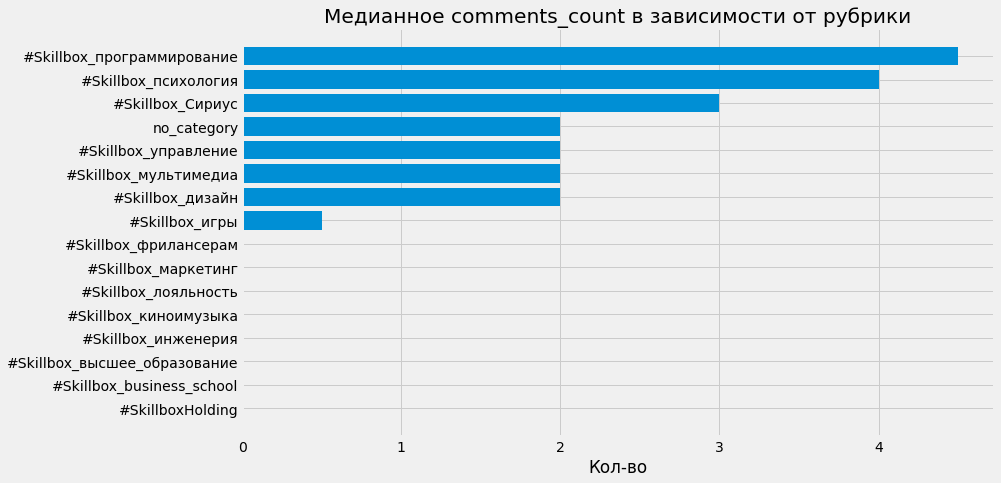

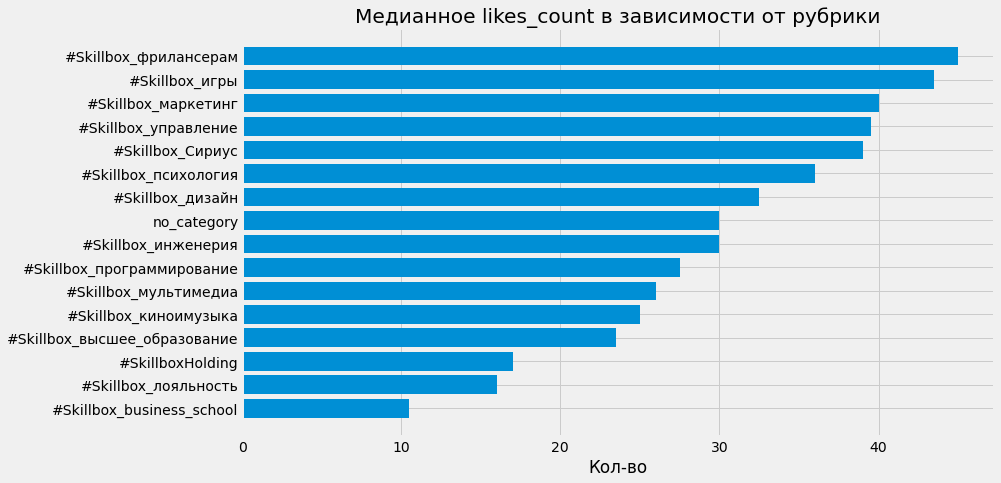

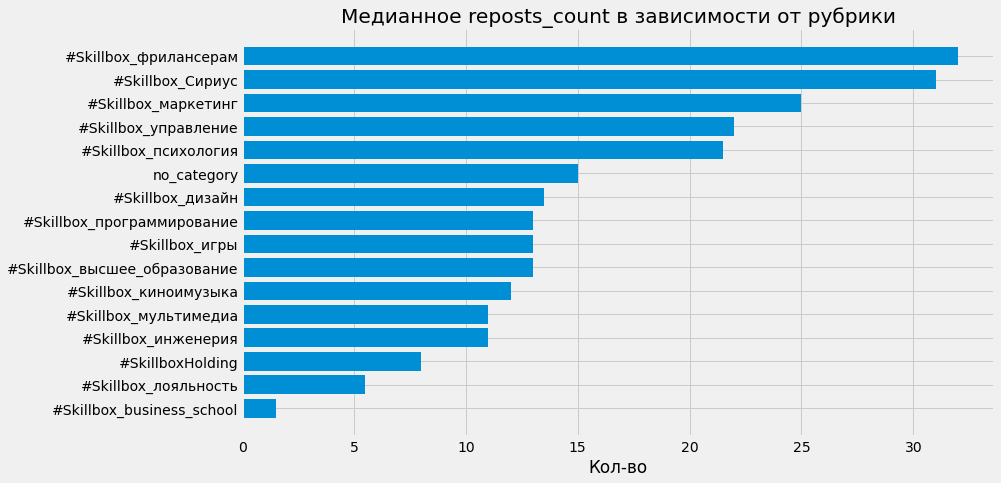

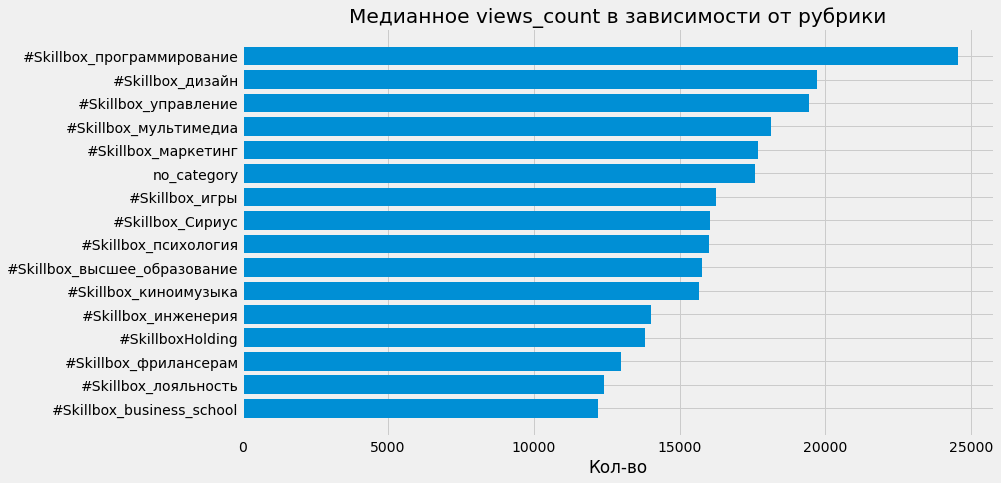

In [181]:
for i_column in median_params_category.columns[0:4]:
    figure, ax = plt.subplots(figsize=(12,7))
    cur_df = mean_params_category[i_column].sort_values()
    ax.barh(y = cur_df.index, width = cur_df)
    ax.set_title('Медианное {} в зависимости от рубрики'.format(i_column))
    ax.set_xlabel('Кол-во')

#### 2 Зависимость кол-ва просмотров, лайков, комментариев, репостов от времени публикации

In [211]:
# найдем средние показатели
df_median_params_by_hours = df_posts_text.groupby('hour')\
    .median()\
    .loc[:, 'comments_count':'views_count']\
    .reset_index()

df_median_params_by_hours


,hour,comments_count,likes_count,reposts_count,views_count
0,8,2.5,36.5,15.0,17588.0
1,9,3.0,31.0,16.0,19884.0
2,10,2.0,36.5,16.5,18702.5
3,11,1.0,28.0,15.0,16874.0
4,12,1.0,29.0,12.0,18619.0
5,13,3.0,31.0,14.0,16647.0
6,14,0.0,29.5,12.0,15538.5
7,15,0.0,26.0,12.0,16120.0
8,16,3.0,27.0,14.0,17393.0
9,17,2.0,28.0,11.0,15902.0


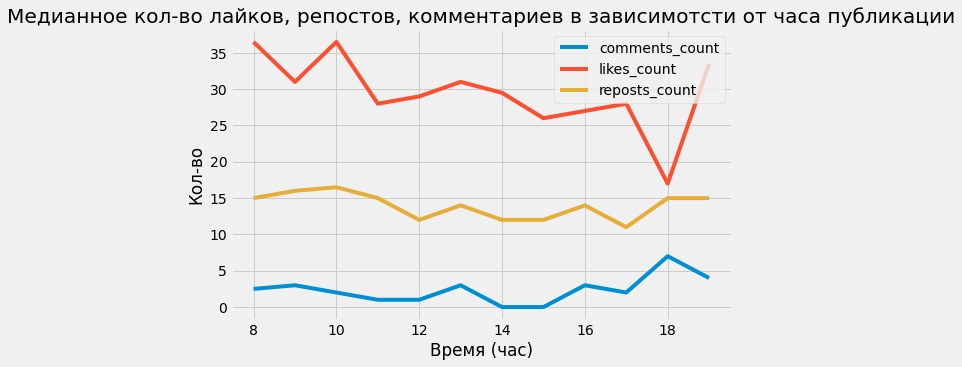

In [314]:
# построим график для лайков, комментариев и репостов
figure, ax = plt.subplots(figsize=(8,5))
for i_param in df_median_params_by_hours.columns[1:4]:
    ax.plot(df_median_params_by_hours['hour'], df_median_params_by_hours[i_param], label=i_param)
    
ax.set_title('Медианное кол-во лайков, репостов, комментариев в зависимотсти от часа публикации')
ax.set_xlabel('Время (час)')
ax.set_ylabel('Кол-во') 
ax.legend(loc=1)
    

Text(0, 0.5, 'Кол-во')

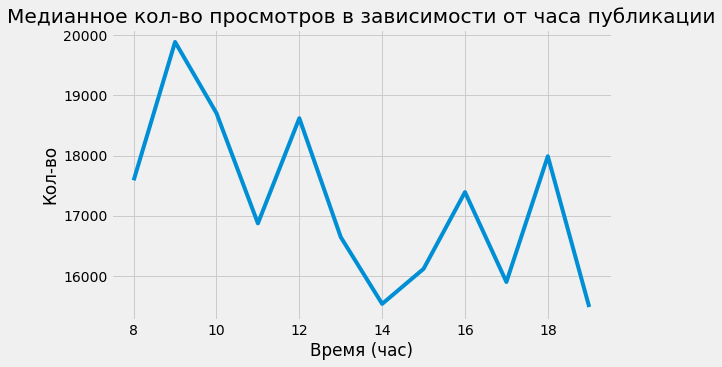

In [319]:
# построим график для кол-ва просмотров
figure, ax = plt.subplots(figsize=(8,5))
ax.plot(df_median_params_by_hours['hour'], df_median_params_by_hours['views_count'])
ax.set_title('Медианное кол-во просмотров в зависимости от часа публикации')
ax.set_xlabel('Время (час)')
ax.set_ylabel('Кол-во') 

In [303]:
df_median_params_by_day = df_posts_text.groupby(['weekday', 'weekday_name']).median()\
    .loc[:,'comments_count':'reposts_count']\
    .stack()\
    .reset_index()

df_median_params_by_day.rename(columns={'level_2':'param', 0:'value'}, inplace=True)
df_median_params_by_day.sort_values(by=['weekday', 'weekday_name'])

,weekday,weekday_name,param,value
0,0,Понедельник,comments_count,0.0
1,0,Понедельник,likes_count,29.0
2,0,Понедельник,reposts_count,14.0
3,1,Вторник,comments_count,3.0
4,1,Вторник,likes_count,30.0
5,1,Вторник,reposts_count,15.0
6,2,Среда,comments_count,2.5
7,2,Среда,likes_count,31.0
8,2,Среда,reposts_count,13.0
9,3,Четверг,comments_count,2.0


Text(0, 0.5, 'День недели')

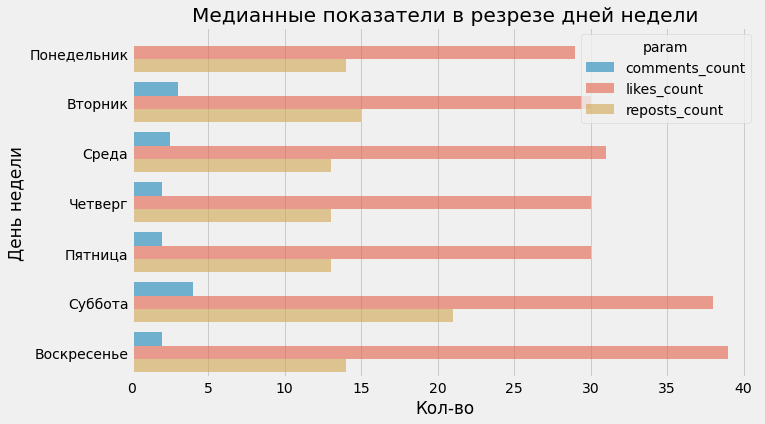

In [318]:
# построим график для лайков, комментариев и репостов
figure, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_median_params_by_day, y='weekday_name', x='value', hue='param', alpha=0.6)
ax.set_title('Медианные показатели в резрезе дней недели')
ax.set_xlabel('Кол-во') 
ax.set_ylabel('День недели') 


In [321]:
df_median_views_by_day = df_posts_text.groupby(['weekday', 'weekday_name']).median()['views_count'].reset_index()
df_median_views_by_day

,weekday,weekday_name,views_count
0,0,Понедельник,18028.0
1,1,Вторник,18127.0
2,2,Среда,15906.5
3,3,Четверг,15065.5
4,4,Пятница,16692.0
5,5,Суббота,19428.0
6,6,Воскресенье,19441.0


Text(0, 0.5, 'День недели')

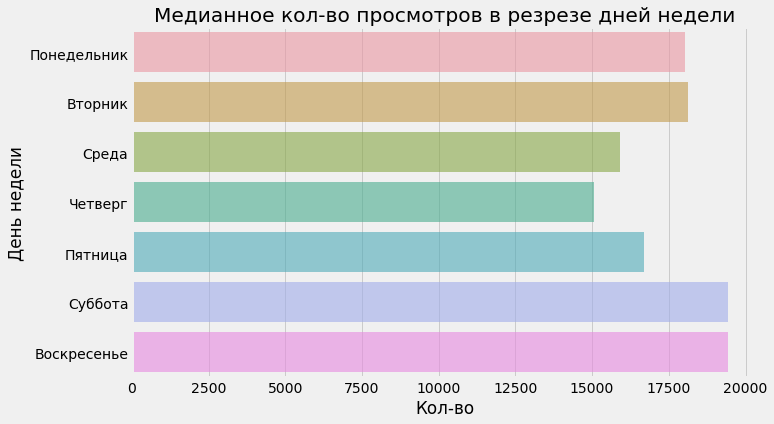

In [332]:
# построим график для кол-ва просмотров
figure, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_median_views_by_day, y='weekday_name', x='views_count', alpha=0.6)
ax.set_title('Медианное кол-во просмотров в резрезе дней недели')
ax.set_xlabel('Кол-во') 
ax.set_ylabel('День недели') 


#### 3 Зависимость кол-ва лайков от типа вложения

In [184]:
maen_likes_by_att = df_posts_text.loc[:, 'attachments_type':'comments_count']\
    .groupby('attachments_type')\
    .median()\
    .sort_values(by='comments_count')

maen_likes_by_att


,comments_count
attachments_type,
doc,1
link,1
video,1
photo,2


Text(0.5, 0, 'Кол-во')

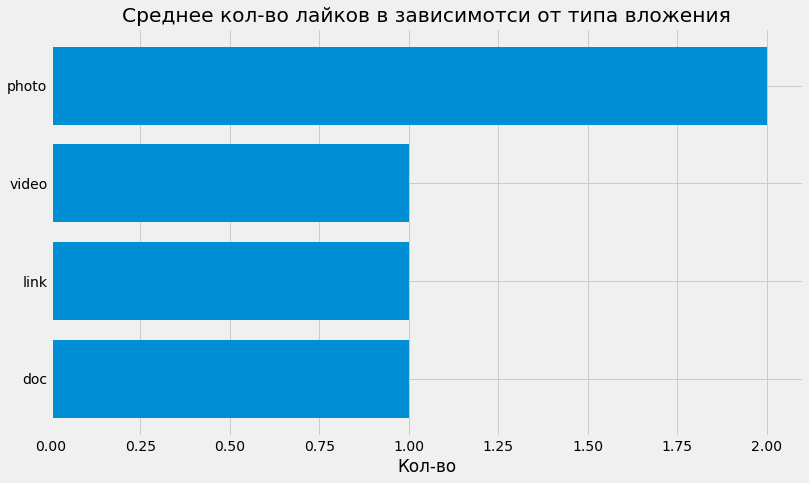

In [185]:
# построим график
figure, ax = plt.subplots(figsize=(12,7))
ax.barh(y=maen_likes_by_att.index, width=maen_likes_by_att['comments_count'])
ax.set_title('Среднее кол-во лайков в зависимотси от типа вложения')
ax.set_xlabel('Кол-во')


#### 4 Зависимость активности аудитории (просмотры, лайки, комментарии, репосты) от месяца

In [200]:
df_median_params_by_month = df_posts_text.groupby('month').median()\
    .loc[:, 'comments_count':'views_count']

df_median_params_by_month

,comments_count,likes_count,reposts_count,views_count
month,,,,
2022-01,2.0,51.0,26.0,21460.0
2022-02,2.5,27.5,13.5,15262.5
2022-03,4.0,47.0,24.0,18371.0
2022-04,2.0,26.0,12.0,14024.0
2022-05,1.0,27.0,13.5,14888.0
2022-06,1.5,26.0,11.0,13318.5
2022-07,4.0,30.0,17.0,19425.0
2022-08,3.0,32.0,15.0,25122.0
2022-09,3.0,34.0,15.0,20601.0


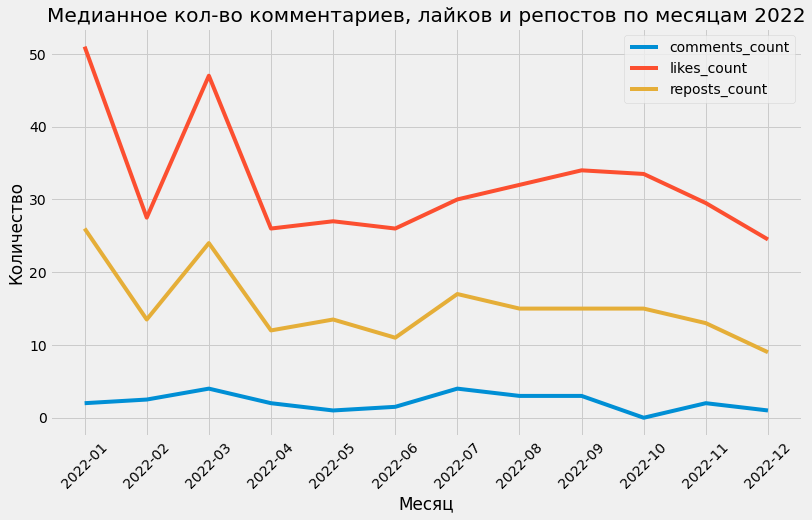

In [207]:
figure, ax = plt.subplots(figsize=(12,7))
for i_columns in df_median_params_by_month.columns[0:3]:
    ax.plot(df_median_params_by_month[i_columns], label=i_columns)
    
ax.legend()
ax.set_title('Медианное кол-во комментариев, лайков и репостов по месяцам 2022')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество')
ax.tick_params(axis='x', rotation=45)

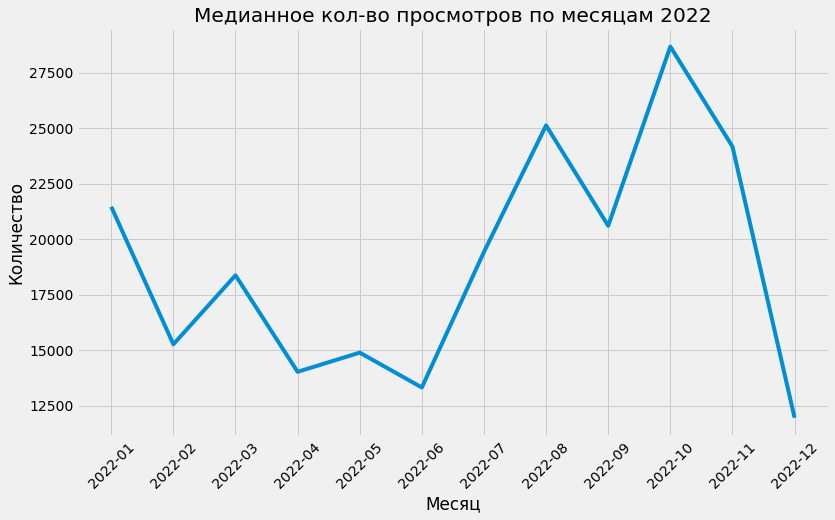

In [209]:
figure, ax = plt.subplots(figsize=(12,7))
ax.plot(df_median_params_by_month['views_count'])


ax.set_title('Медианное кол-во просмотров по месяцам 2022')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество')
ax.tick_params(axis='x', rotation=45)

#### 5 Конверсия лайков в зависимости от рубрики (процентное соотношение просмотров и лайков)

In [196]:
df_median_likes_views = df_posts_text[['likes_count', 'views_count', 'category']]\
    .groupby('category')\
    .agg(
        likes_count = ('likes_count', 'median')
        , views_count = ('views_count', 'median')
        , posts_count = ('likes_count', 'count'))\
    .sort_values(by='posts_count')

df_median_likes_views['conv'] = df_median_likes_views['likes_count']/df_median_likes_views['views_count'] * 100
df_median_likes_views.sort_values(by='conv', inplace=True)

df_median_likes_views


,likes_count,views_count,posts_count,conv
category,,,,
#Skillbox_business_school,10.5,12201.5,2,0.086055
#Skillbox_программирование,27.5,24549.5,16,0.112019
#SkillboxHolding,17.0,13808.0,3,0.123117
#Skillbox_лояльность,16.0,12424.0,4,0.128783
#Skillbox_мультимедиа,26.0,18127.0,11,0.143432
#Skillbox_высшее_образование,23.5,15782.0,12,0.148904
#Skillbox_киноимузыка,25.0,15669.0,27,0.159551
#Skillbox_дизайн,32.5,19699.0,58,0.164983
no_category,30.0,17574.5,262,0.170702


Text(0.5, 0, '% лайков от просмотров')

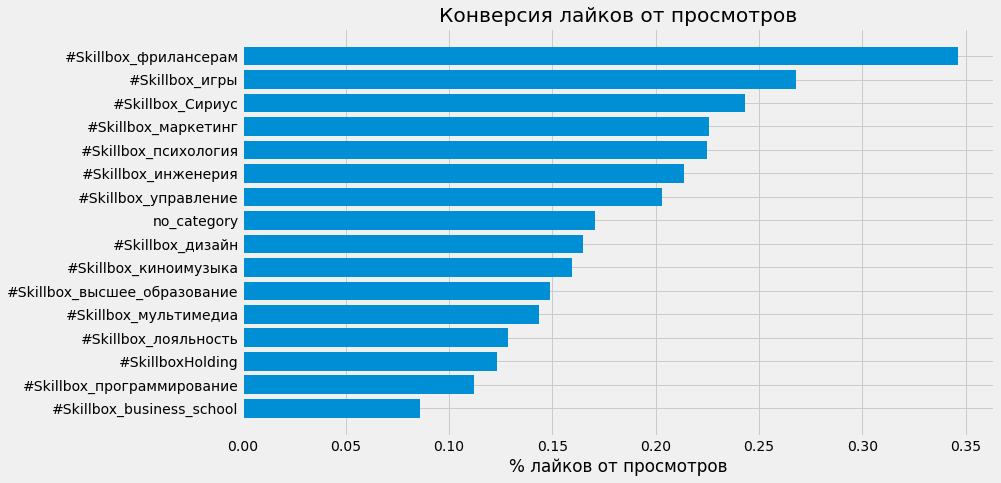

In [198]:
figure, ax = plt.subplots(figsize = (12,7))
ax.barh(y=df_median_likes_views.index, width=df_median_likes_views['conv'])
ax.set_title('Конверсия лайков от просмотров')
ax.set_xlabel('% лайков от просмотров')

## Выводы
Проанализировав интерес аудитории к паблику "Skillbox: образовательная платформа"
мы можем сделать следующие выводы:

1. В среднем каждый пост в течение года набирал более 17 тыс. просмотров, 30 лайков, 14 репостов и 2 комментария


2. Топ-3 рубрики:
    - по просмотрам:
        - #Skillbox_програмирование
        - #Skillbox_дизайн
        - #Skillbox_управление
    - по лайкам:
        - #Skillbox_фрилансерам
        - #Skillbox_игры
        - #Skillbox_маркетинг
    - по репостам:
        - #Skillbox_фрилансерам
        - #Skillbox_Сириус
        - #Skillbox_маркетинг
    - по комментариям:
        - #Skillbox_програмирование
        - #Skillbox_психология
        - #Skillbox_Сириус
        
        
3. Наименее популярные рубрики (в каждом из параметров они входили в топ-5 самых низких показателей):
 - #Skillbox_business_school
 - #Skillbox_лояльность
 - #SkillboxHolding


4. Наблюдается тенденция, что пользователи более активны утром и вечером, а днем их активность снижается. 
    
    Наибольшее кол-во лайков пользователи оставляют утром, затем количество постепенно снижается с максимальных 36 до 17 к шести часам вечера.  

    Наиболее популярные часы для репостов -  утром с 08:00 до 11:00, затем вечером с 17:00 до 19:00

    Максимальная активность комментаторов приходится на вечер. В среднем с 16:00 до 18:00 оставляют от 3 до 5 комментариев. В остальное время от 0 до 3.

    Активность по просмотрам высокая утром, в 09:00 часов она достигает почти 20 тыс., затем постепенно снижается. Вечером максимальная активность наблюдается в 18:00 часов - 18 тыс. просмотров. 
    В  14:00 самый низкий показатель за весь день -  15.5 тыс просмотров. 
        
    В целом мы можем сделать вывод, что те люди, которые активно просматривают посты утром, также активно ставят лайки, а те, кто вечером, оставляют больше комментариев и делают репосты. Т.е. вечером активность по просмотрам меньше, но реальных действий от пользователей больше.  


5. В течение недели активность пользователей также разнится от параметра к параметру. Так максимальное кол-во лайков ставят в выходные - суббота, воскресенье. А вот кол-во репостов и комментариев среди недели почти не изменяется. Но мы можем обратить внимание на заметный на рос числа комментариев в субботу - 4, тогда как в понедельник - 0. 
    Так же к выходным растет кол-во просмотров 19.5 тыс. Тогда как среди недели оно варьируется от 15 до 18 тыс.
    
    
6. Больше всего пользователи лайкают посты с фото. Скорее всего, потому что это простой и понятный способ получения информации, в отличие от видео, ссылок и документов, которые требуют еще дополнительных действий. 


7. Наиболее активны пользователи были в марте. Скорее всего это связано с ограничениями работы запрещенной сети и ростом интереса к онлайн-образованию поле начала СВО. При этом необходимо обратить внимание, что среднее кол-во просмотров в марте было не таким высоким как в конце года. Это говорит о том, что в марте в паблик пришла активная аудитория, которая не просто просматривала посты, а была максимально заинтересована, поэтому активных действий - репостов, лайков, комментариев - больше чем в другие месяцы. 


8. Конверсия лайков от просмотров низкая, что сейчас наблюдается по всем социальным сетям. Увеличилось кол-во контента, люди меньше ставят лайки, просто пролистывая к следующему посту. 
   Но конверсия лайков от просмотров подтверждает, что #Skillbox_фрилансерам оказалась популярной рубрикой, также людям понравилась #Skillbox_игры.
   Планку в 0.2% конверсии превысили рубрики:
   - #Skillbox_фрилансерам
   - #Skillbox_игры
   - #Skillbox_маркетинг
   - #Skillbox_Сириус	
   - #Skillbox_психология
   - #Skillbox_инженерия
   - #Skillbox_управление
   
   
9. Наименее популярные рубрики по конверсии лайков:
 - #Skillbox_business_school
 - #Skillbox_программирование
 - #SkillboxHolding
 - #Skillbox_лояльность

## Рекомендации для SMM-отдела

1. Если мы хотим, чтобы аудитория совершала больше активных действий с нашими публикациями, то необходимо выставлять их вечером с 17:00 до 19:00 в будние.


2. В обед с 13:00 до 16:00 в будние не стоит публиковать важные материалы. В это время самые низкие просмотры за весь день. 


2. Несмотря на то, что кол-во просмотров в январе меньше чем, во второй половине года, активность аудитории в этом месяце выше. Т.е. в январе к нам приходит более "качественная" аудитория. Можно выставлять наиболее важные публикации или продающие посты. Так же в течение года есть рост активности пользователей с августа по октябрь. 


3. Продолжать вести рубрики #Skillbox_игры, #Skillbox_маркетинг, #Skillbox_психология они вызывают наибольший отклик среди нашей аудитории


4. Продолжить рубрику #Skillbox_фрилансерам. По ней был всего один пост, но у него была высокая конверсия по лайкам. Возможно, сделать постоянную рубрику про удаленную работу.


5. Искать новые актуальные темы для рубрик, это поможет привлечь и удержать аудиторию. Например, #Skillbox_психология - не очевидная рубрика для паблика образовательной платформы, но она оказалась популярной, потому что люди сейчас в принципе интересуются психологией. 
